In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 4.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d0ccd4304dd565c5c5291a9e2727c575ca5c95b8ee0f5d3ceb5a615ac4794251
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import lifelines
from lifelines import NelsonAalenFitter
from lifelines.statistics import logrank_test

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 생존분석용 데이터 2022YM_surv 살펴보기

In [ ]:
import pandas as pd

YM_surv = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv', encoding='utf-8')
YM_surv

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
0,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466001,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
1,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466002,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
2,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914001,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
3,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914002,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
4,FC223396,FC223396-01,PF307406,2022-04-19 17:00:00,W2250065445001,2022-04-19 15:18:00,1,2022-04-18 00:00:00,2022-04-19 16:55:00,2
...,...,...,...,...,...,...,...,...,...,...
14464146,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:30:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
14464147,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:41:00,2,2022-12-20 19:00:00,2022-12-30 17:00:00,10
14464148,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092822300035,2022-12-30 16:34:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
14464149,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539093471400046,2022-12-30 16:40:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10


In [ ]:
pd.DataFrame(YM_surv['판매기간'].value_counts()).reset_index()

,index,판매기간
0,1,832335
1,38,608423
2,39,596476
3,37,564444
4,45,552169
...,...,...
243,247,3
244,240,2
245,236,2
246,248,2


In [ ]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


(array([1.819818e+06, 1.281638e+06, 2.169386e+06, 3.078169e+06,
        3.580589e+06, 3.316351e+06, 2.286865e+06, 1.992182e+06,
        1.047581e+06, 7.542370e+05, 4.568790e+05, 3.061860e+05,
        1.421150e+05, 1.281590e+05, 9.218800e+04, 4.106400e+04,
        4.083600e+04, 2.496100e+04, 3.955700e+04, 1.089000e+04,
        8.040000e+03, 1.209400e+04, 2.133000e+03, 3.282000e+03,
        1.028900e+04, 5.272000e+03, 2.125000e+03, 1.493000e+03,
        5.650000e+02, 2.800000e+01]),
 array([  1.        ,   9.53333333,  18.06666667,  26.6       ,
         35.13333333,  43.66666667,  52.2       ,  60.73333333,
         69.26666667,  77.8       ,  86.33333333,  94.86666667,
        103.4       , 111.93333333, 120.46666667, 129.        ,
        137.53333333, 146.06666667, 154.6       , 163.13333333,
        171.66666667, 180.2       , 188.73333333, 197.26666667,
        205.8       , 214.33333333, 222.86666667, 231.4       ,
        239.93333333, 248.46666667, 257.        ]),
 <BarContainer

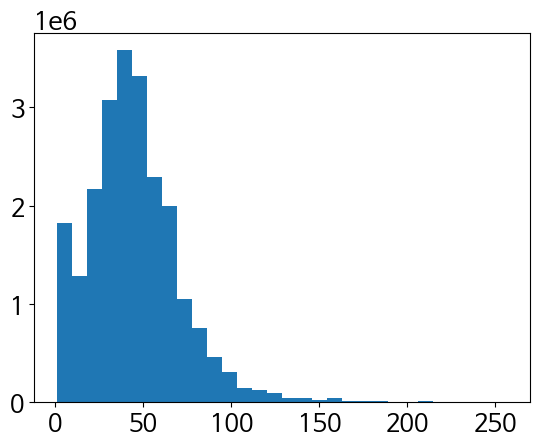

In [ ]:
plt.hist(x='판매기간', data=YM_surv, bins=30)

In [ ]:
import pandas as pd
allCO = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/allCO_230816_sale_update.csv', encoding='utf-8', usecols=['공연코드','장르명'])
allCO.drop_duplicates(inplace=True)
allCO

,공연코드,장르명
0,PF300001,연극
84,PF300003,연극
95,PF300257,뮤지컬
200,PF300778,연극
235,PF301247,뮤지컬
...,...,...
196595,PF427510,대중음악
196596,PF427511,대중음악
196597,PF427582,뮤지컬
196598,PF427659,서양음악(클래식)


In [ ]:
YM_surv_genre = pd.merge(YM_surv, allCO, on='공연코드', how='inner')
YM_surv_genre

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간,장르명
0,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466001,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1,연극
1,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466002,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1,연극
2,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914001,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2,연극
3,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914002,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2,연극
4,FC222028,FC222028-01,PF343804,2022-04-20 17:15:00,W2269283227001,2022-04-20 14:13:00,1,2022-04-18 00:00:00,2022-04-20 17:15:00,3,연극
...,...,...,...,...,...,...,...,...,...,...,...
14464146,FC222223,FC222223-03,PF424726,2022-12-31 22:00:00,T2112653697,2022-12-31 21:44:00,1,2022-12-20 00:00:00,2022-12-20 00:00:00,1,서양음악(클래식)
14464147,FC222223,FC222223-03,PF424726,2022-12-31 22:00:00,T2112657450,2022-12-31 21:58:00,1,2022-12-20 00:00:00,2022-12-20 00:00:00,1,서양음악(클래식)
14464148,FC222223,FC222223-03,PF424726,2022-12-31 22:00:00,T2112657451,2022-12-31 21:58:00,1,2022-12-20 00:00:00,2022-12-20 00:00:00,1,서양음악(클래식)
14464149,FC222223,FC222223-03,PF424726,2022-12-31 22:00:00,T2112657452,2022-12-31 21:58:00,1,2022-12-20 00:00:00,2022-12-20 00:00:00,1,서양음악(클래식)


In [ ]:
YM_surv_genre['장르명'].nunique()

9

In [ ]:
YM_surv_genre['장르명'].unique()

array(['연극', nan, '뮤지컬', '서양음악(클래식)', '대중음악', '한국음악(국악)', '서커스/마술',
       '무용(서양/한국무용)', '대중무용', '복합'], dtype=object)

In [ ]:
YM_surv_genre[YM_surv_genre.장르명.isna()]

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간,장르명
5,FC223505,FC223505-01,PF300663,2022-04-19 19:30:00,251928465_0,2022-03-23 14:30:00,1,2022-04-19 00:00:00,2022-04-19 00:00:00,1,NaN
6,FC223505,FC223505-01,PF300663,2022-04-19 19:30:00,256841400_0,2022-04-05 19:07:00,1,2022-04-19 00:00:00,2022-04-19 00:00:00,1,NaN
7,FC223505,FC223505-01,PF300663,2022-04-19 19:30:00,256841400_1,2022-04-05 19:07:00,1,2022-04-19 00:00:00,2022-04-19 00:00:00,1,NaN
8,FC223505,FC223505-01,PF300663,2022-04-19 19:30:00,256841400_2,2022-04-05 19:07:00,1,2022-04-19 00:00:00,2022-04-19 00:00:00,1,NaN
9,FC223505,FC223505-01,PF300663,2022-04-19 19:30:00,256997208_0,2022-04-06 10:05:00,1,2022-04-19 00:00:00,2022-04-19 00:00:00,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22646577,FC222759,FC222759-01,PF426633,2022-12-31 21:00:00,1438717493_2,2022-12-31 16:57:00,2,2022-12-16 14:00:00,2022-12-31 12:00:00,15,NaN
22646578,FC222759,FC222759-01,PF426633,2022-12-31 21:00:00,1438721040_1,2022-12-31 17:04:00,2,2022-12-16 14:00:00,2022-12-31 12:00:00,15,NaN
22646579,FC222759,FC222759-01,PF426633,2022-12-31 21:00:00,1438721040_2,2022-12-31 17:04:00,2,2022-12-16 14:00:00,2022-12-31 12:00:00,15,NaN
22646580,FC222759,FC222759-01,PF426633,2022-12-31 21:00:00,1438721040_3,2022-12-31 17:04:00,2,2022-12-16 14:00:00,2022-12-31 12:00:00,15,NaN


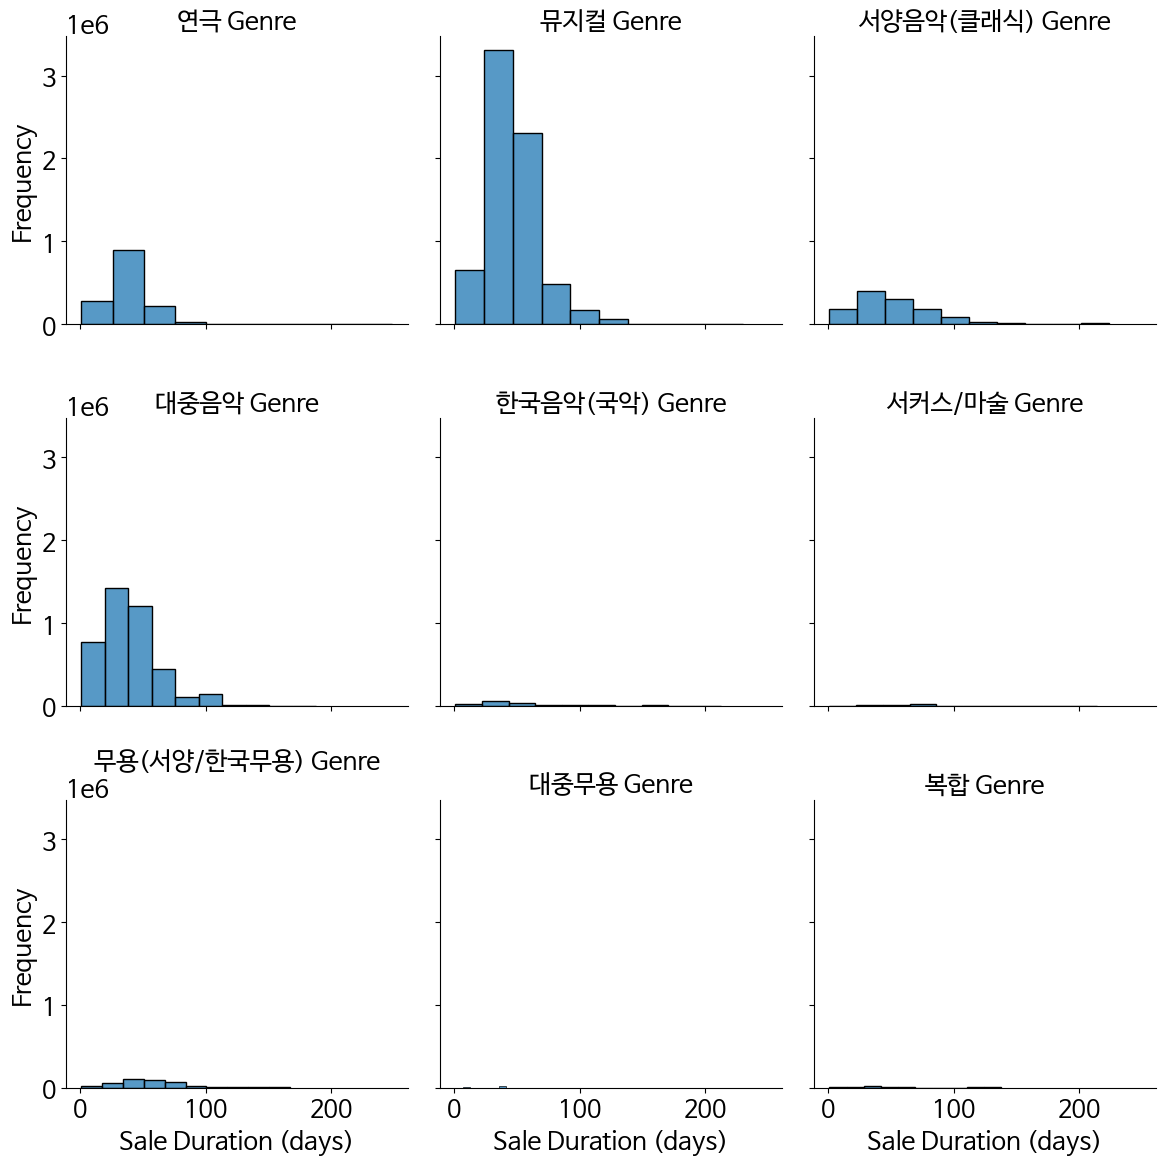

In [ ]:
g = sns.FacetGrid(YM_surv_genre, col="장르명", col_wrap=3, height=4)
g.map(sns.histplot, "판매기간", bins=10)

g.set_axis_labels("Sale Duration (days)", "Frequency")
g.set_titles(col_template="{col_name} Genre")
g.tight_layout()
plt.show()

In [ ]:
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/survival_df.csv')
sdf.set_index('입장권고유번호', inplace=True)
sdf

,delta,y,group
입장권고유번호,,,
W2229628466001,0,1,A
W2229628466002,0,1,A
W2229226914001,0,1,A
W2229226914002,0,1,A
W2250065445001,0,1,A
...,...,...,...
39539086152200047,0,2,A
39539092431600024,1,1,A
39539092822300035,0,2,A


## Kaplan-Meier (Non-parametric method)

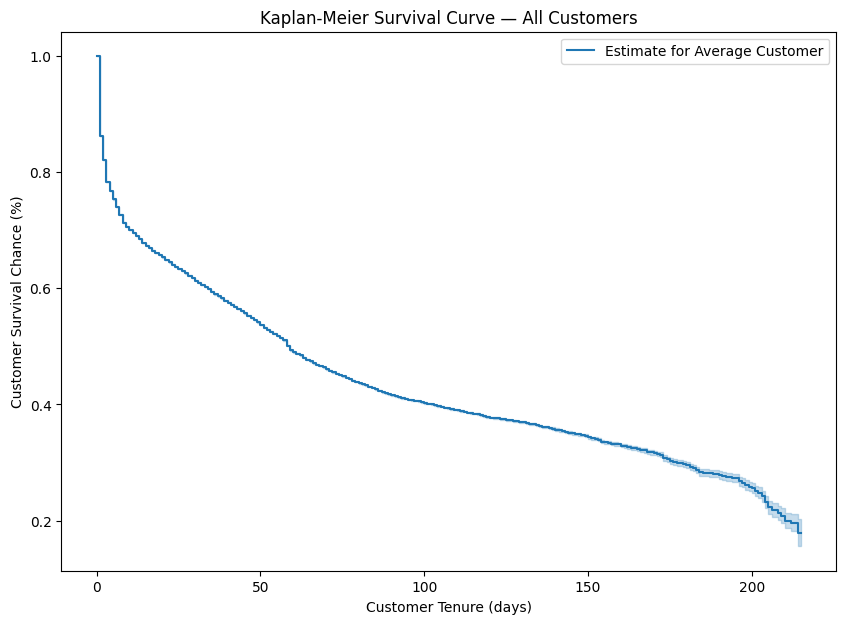

In [ ]:
import lifelines
from lifelines import NelsonAalenFitter

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


# fitting kmf to churn data
t = sdf['y'].values
delta = sdf['delta'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=delta, label='Estimate for Average Customer')
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure (days)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

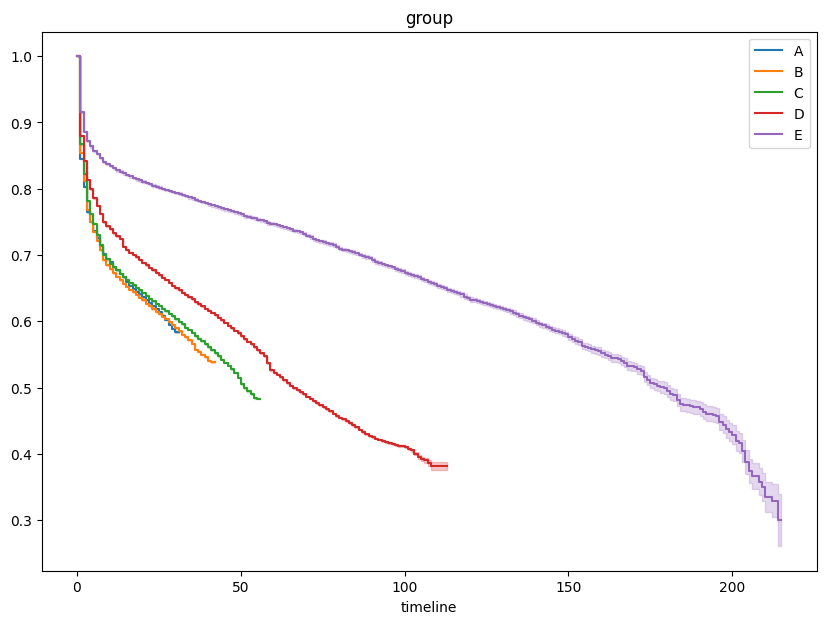

In [ ]:
# kaplain-meier
t = sdf['y'].values
delta = sdf['delta'].values

fig, ax = plt.subplots(figsize=(10,7))
group = 'group'
for name, df in sdf.groupby(group):
    idx = sdf[group] == name
    kmf = lifelines.KaplanMeierFitter().fit(t[idx], delta[idx], alpha=0.05, label=name)
    kmf.plot_survival_function(ax=ax)
plt.title(group);

In [ ]:
#groupA


gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv', encoding='utf-8')
gA.info()

<ipython-input-7-aa7cb37856bf>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv', encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501878 entries, 0 to 2501877
Data columns (total 29 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   공연시설인기    object 
 4   편의시설      int64  
 5   장애인시설     int64  
 6   주차시설      int64  
 7   교통개수      int64  
 8   팔로워합      float64
 9   수상실적개수    int64  
 10  매출액       float64
 11  좌석등급개수    int64  
 12  장르명       object 
 13  세부장르명     object 
 14  아동공연 여부   bool   
 15  축제 여부     bool   
 16  내한공연 여부   bool   
 17  단독판매여부    bool   
 18  성별        int64  
 19  예매금액      int64  
 20  취소금액      int64  
 21  예매할인율     float64
 22  공연별전사코개수  int64  
 23  무대시설      int64  
 24  총확진자      int64  
 25  강수        float64
 26  습도        float64
 27  기온        float64
 28  미세먼지등급    float64
dtypes: bool(4), float64(7), int64(14), object(4)
memory usage: 486.7+ MB


In [ ]:
gA.head()

,입장권고유번호,delta,y,공연시설인기,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,...,예매금액,취소금액,예매할인율,공연별전사코개수,무대시설,총확진자,강수,습도,기온,미세먼지등급
0,W2229628466001,0,1,D,0,0,0,22,0.0,0,...,7900,0,0.0,4,2,3337282,0.0,70.0,10.3,1.0
1,W2229628466002,0,1,D,0,0,0,22,0.0,0,...,7900,0,0.0,4,2,3337282,0.0,70.0,10.3,1.0
2,W2229226914001,0,1,D,0,0,0,22,0.0,0,...,7900,0,0.0,4,2,3359097,0.0,66.0,11.5,1.0
3,W2229226914002,0,1,D,0,0,0,22,0.0,0,...,7900,0,0.0,4,2,3359097,0.0,66.0,11.5,1.0
4,W2250065445001,0,1,F,2,0,1,29,156.0,0,...,7900,0,0.0,3,1,3359097,0.0,71.0,10.7,1.0


In [ ]:
gA['무대시설'].value_counts()

2    925414
0    728110
1    538251
3    310103
Name: 무대시설, dtype: int64

In [ ]:
#categorical 변수 One-Hot Encoding 및 Label Encoding 진행
#One-Hot Encoding: 공연시설인기, 장르명, 미세먼지등급
#Label Encoding: 아동공연 여부, 축제 여부, 내한공연 여부, 단독판매여부

gA_dum = pd.get_dummies(gA, columns = ['공연시설인기', '장르명', '미세먼지등급'], prefix = ['공연시설인기', '장르명', '미세먼지등급'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gA_dum['아동공연 여부'] = encoder.fit_transform(gA_dum['아동공연 여부'])
gA_dum['축제 여부'] = encoder.fit_transform(gA_dum['축제 여부'])
gA_dum['내한공연 여부'] = encoder.fit_transform(gA_dum['내한공연 여부'])
gA_dum['단독판매여부'] = encoder.fit_transform(gA_dum['단독판매여부'])

gA_dum.set_index('입장권고유번호', inplace=True)
gA_dum.head()

,delta,y,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,...,장르명_뮤지컬,장르명_복합,장르명_서양음악(클래식),장르명_서커스/마술,장르명_연극,장르명_한국음악(국악),미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
W2229628466001,0,1,0,0,0,22,0.0,0,3366500.0,1,...,0,0,0,0,1,0,0,1,0,0
W2229628466002,0,1,0,0,0,22,0.0,0,3366500.0,1,...,0,0,0,0,1,0,0,1,0,0
W2229226914001,0,1,0,0,0,22,0.0,0,3366500.0,1,...,0,0,0,0,1,0,0,1,0,0
W2229226914002,0,1,0,0,0,22,0.0,0,3366500.0,1,...,0,0,0,0,1,0,0,1,0,0
W2250065445001,0,1,2,0,1,29,156.0,0,936750.0,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
gA_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2501878 entries, W2229628466001 to 39539093721600024
Data columns (total 44 columns):
 #   Column           Dtype  
---  ------           -----  
 0   delta            int64  
 1   y                int64  
 2   편의시설             int64  
 3   장애인시설            int64  
 4   주차시설             int64  
 5   교통개수             int64  
 6   팔로워합             float64
 7   수상실적개수           int64  
 8   매출액              float64
 9   좌석등급개수           int64  
 10  세부장르명            object 
 11  아동공연 여부          int64  
 12  축제 여부            int64  
 13  내한공연 여부          int64  
 14  단독판매여부           int64  
 15  성별               int64  
 16  예매금액             int64  
 17  취소금액             int64  
 18  예매할인율            float64
 19  공연별전사코개수         int64  
 20  무대시설             int64  
 21  총확진자             int64  
 22  강수               float64
 23  습도               float64
 24  기온               float64
 25  공연시설인기_A         uint8  
 26  공연시설인기_B         uint8  

In [ ]:
gA_dum.isnull().sum()

delta              0
y                  0
편의시설               0
장애인시설              0
주차시설               0
교통개수               0
팔로워합               0
수상실적개수             0
매출액                0
좌석등급개수             0
세부장르명              0
아동공연 여부            0
축제 여부              0
내한공연 여부            0
단독판매여부             0
성별                 0
예매금액               0
취소금액               0
예매할인율              0
공연별전사코개수           0
무대시설               0
총확진자               0
강수                 0
습도                 0
기온                 0
공연시설인기_A           0
공연시설인기_B           0
공연시설인기_C           0
공연시설인기_D           0
공연시설인기_E           0
공연시설인기_F           0
장르명_대중무용           0
장르명_대중음악           0
장르명_무용(서양/한국무용)    0
장르명_뮤지컬            0
장르명_복합             0
장르명_서양음악(클래식)      0
장르명_서커스/마술         0
장르명_연극             0
장르명_한국음악(국악)       0
미세먼지등급_0.0         0
미세먼지등급_1.0         0
미세먼지등급_2.0         0
미세먼지등급_3.0         0
dtype: int64

In [ ]:
gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv', encoding='utf-8')
gB = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupB.csv', encoding='utf-8')
gC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupC.csv', encoding='utf-8')
gD = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupD.csv', encoding='utf-8')

<ipython-input-4-c75ff1f873a1>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv', encoding='utf-8')


In [ ]:
gA_sample = gA.sample(frac=0.2)
gB_sample = gB.sample(frac=0.2)
gC_sample = gC.sample(frac=0.2)
gD_sample = gD.sample(frac=0.2)

In [ ]:
gA_sample['group'] = 'A'
gB_sample['group'] = 'B'
gC_sample['group'] = 'C'
gD_sample['group'] = 'D'
g_all_sample = pd.concat([gA_sample, gB_sample, gC_sample, gD_sample])
g_all_sample

,입장권고유번호,delta,y,공연시설인기,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,...,취소금액,예매할인율,공연별전사코개수,무대시설,총확진자,강수,습도,기온,미세먼지등급,group
1304590,390050326221000462,1,1,A,2,1,1,1,0.0,0,...,132000,0.0,1,0,4679529,0.0,55.0,19.200001,0.0,A
696459,T1974521250,1,5,A,3,0,1,20,0.0,0,...,150000,0.0,1,2,3761516,0.0,87.0,22.700001,0.0,A
2052120,2022110410210300300000350007,0,15,E,3,4,1,28,0.0,0,...,0,0.0,1,2,5172272,0.0,77.0,6.300000,1.0,A
2329616,1437829019_1,0,28,C,0,0,1,28,20419.0,1,...,0,0.0,3,2,5539642,0.0,65.0,-4.300000,1.0,A
918155,33492978147400372,0,28,A,3,0,1,20,0.0,0,...,0,0.0,1,2,4112259,0.0,80.0,28.299999,1.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093325,39075887323300055,1,1,D,0,2,1,24,11629.0,0,...,150000,0.0,5,2,4841265,6.5,94.0,18.200001,0.0,D
1933983,T2052823970,1,51,E,2,4,1,26,0.0,0,...,35000,0.0,1,3,5328989,0.0,62.0,0.400000,1.0,D
2444128,T2064511400,0,64,B,2,3,1,14,94415.0,0,...,0,0.0,1,3,5640031,0.0,82.0,-1.600000,1.0,D
2391399,T2068452570,1,1,E,0,0,0,17,21343.0,0,...,150000,0.0,2,2,5610852,0.0,87.0,-2.200000,1.0,D


In [ ]:
g_sample = pd.get_dummies(g_all_sample, columns = ['공연시설인기', '장르명', '미세먼지등급', 'group'], prefix = ['공연시설인기', '장르명', '미세먼지등급', 'group'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
g_sample['아동공연 여부'] = encoder.fit_transform(g_sample['아동공연 여부'])
g_sample['축제 여부'] = encoder.fit_transform(g_sample['축제 여부'])
g_sample['내한공연 여부'] = encoder.fit_transform(g_sample['내한공연 여부'])
g_sample['단독판매여부'] = encoder.fit_transform(g_sample['단독판매여부'])

g_sample.set_index('입장권고유번호', inplace=True)
g_sample.head()

,delta,y,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,...,장르명_연극,장르명_한국음악(국악),미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0,group_A,group_B,group_C,group_D
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
390050326221000462,1,1,2,1,1,1,0.0,0,2.678940e+09,1,...,0,0,1,0,0,0,1,0,0,0
T1974521250,1,5,3,0,1,20,0.0,0,2.038640e+08,4,...,0,0,1,0,0,0,1,0,0,0
2022110410210300300000350007,0,15,3,4,1,28,0.0,0,0.000000e+00,1,...,0,0,0,1,0,0,1,0,0,0
1437829019_1,0,28,0,0,1,28,20419.0,1,1.339650e+07,2,...,0,0,0,1,0,0,1,0,0,0
33492978147400372,0,28,3,0,1,20,0.0,0,9.775920e+08,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = g_sample.iloc[:,2:]
y = g_sample.iloc[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1886)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1608751, 46) (402188, 46) (1608751, 2) (402188, 2)


In [ ]:
X_train.drop('세부장르명', axis=1, inplace=True)
X_test.drop('세부장르명', axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing

#normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train)
X_test_norm = norm_fit.transform(X_test) #test data를 정규화하는 경우 train data의 통계량 이용

#standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train)
X_test_stan = stan_fit.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
g_sample_train, g_sample_test = train_test_split(g_sample, test_size=0.2, stratify = g_sample['delta'], random_state=1886)
print(g_sample_train.shape, g_sample_test.shape)

(1608751, 48) (402188, 48)


In [ ]:
g_sample_train.drop('세부장르명', axis=1, inplace=True)
g_sample_test.drop('세부장르명', axis=1, inplace=True)

In [ ]:
from sklearn import preprocessing

#normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(g_sample_train.iloc[:,2:])
train_norm = norm_fit.transform(g_sample_train.iloc[:,2:])
test_norm = norm_fit.transform(g_sample_test.iloc[:,2:]) #test data를 정규화하는 경우 train data의 통계량 이용

#standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(g_sample_train.iloc[:,2:])
train_stan = stan_fit.transform(g_sample_train.iloc[:,2:])
test_stan = stan_fit.transform(g_sample_test.iloc[:,2:])

In [ ]:
from lifelines import CoxPHFitter, AalenAdditiveFitter, WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter

cph = CoxPHFitter()
aaf = AalenAdditiveFitter()
llf = LogLogisticAFTFitter()
lnf = LogNormalAFTFitter()
wf = WeibullAFTFitter()

In [ ]:
print(g_sample_train.shape, train_norm.shape)

(1608751, 47) (1608751, 45)


In [ ]:
g_sample_train

,delta,y,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,...,장르명_연극,장르명_한국음악(국악),미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0,group_A,group_B,group_C,group_D
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
T2006907730,1,29,4,3,1,36,36307.0,0,10580000.0,4,...,0,0,1,0,0,0,0,0,1,0
T2037511772,1,3,2,1,1,1,0.0,0,245629500.0,6,...,0,0,1,0,0,0,0,0,0,1
T2025429833,0,38,5,4,1,25,0.0,0,480033500.0,5,...,0,0,0,1,0,0,0,0,0,1
2990208243091800033,0,31,0,0,1,43,0.0,1,25280700.0,2,...,0,0,0,1,0,0,0,1,0,0
M224452604101,0,53,2,3,1,31,43221.0,0,41197100.0,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1964761770,0,17,2,1,1,1,0.0,0,672804000.0,1,...,0,0,0,1,0,0,0,0,0,1
T2048311580,0,41,2,3,1,50,0.0,0,73378800.0,1,...,0,0,0,1,0,0,0,0,1,0
T1932578721,1,1,4,3,1,36,0.0,0,17665000.0,2,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
g_sample_train.iloc[:,:2].to_numpy

<bound method DataFrame.to_numpy of                      delta   y
입장권고유번호                       
T2006907730              1  29
T2037511772              1   3
T2025429833              0  38
2990208243091800033      0  31
M224452604101            0  53
...                    ...  ..
T1964761770              0  17
T2048311580              0  41
T1932578721              1   1
T0898149843              0  42
M225502569101            0  14

[1608751 rows x 2 columns]>

In [ ]:
import numpy as np
train_norm_y = np.concatenate((g_sample_train.iloc[:,:2].to_numpy(), train_norm), axis=1)
test_norm_y = np.concatenate((g_sample_test.iloc[:,:2].to_numpy(), test_norm), axis=1)

train_stan_y = np.concatenate((g_sample_train.iloc[:,:2].to_numpy(), train_stan), axis=1)
test_stan_y = np.concatenate((g_sample_test.iloc[:,:2].to_numpy(), test_stan), axis=1)

In [ ]:
print(train_norm_y[:,0], train_norm_y[:,1])

[1. 1. 0. ... 1. 0. 0.] [29.  3. 38. ...  1. 42. 14.]


In [ ]:
g_sample_train.columns

Index(['delta', 'y', '편의시설', '장애인시설', '주차시설', '교통개수', '팔로워합', '수상실적개수', '매출액',
       '좌석등급개수', '아동공연 여부', '축제 여부', '내한공연 여부', '단독판매여부', '성별', '예매금액', '취소금액',
       '예매할인율', '공연별전사코개수', '무대시설', '총확진자', '강수', '습도', '기온', '공연시설인기_A',
       '공연시설인기_B', '공연시설인기_C', '공연시설인기_D', '공연시설인기_E', '공연시설인기_F', '장르명_대중무용',
       '장르명_대중음악', '장르명_무용(서양/한국무용)', '장르명_뮤지컬', '장르명_복합', '장르명_서양음악(클래식)',
       '장르명_서커스/마술', '장르명_연극', '장르명_한국음악(국악)', '미세먼지등급_0.0', '미세먼지등급_1.0',
       '미세먼지등급_2.0', '미세먼지등급_3.0', 'group_A', 'group_B', 'group_C', 'group_D'],
      dtype='object')

In [ ]:
train_norm_y = pd.DataFrame(train_norm_y, columns = g_sample_train.columns.to_list())

In [ ]:
train_norm_y

,delta,y,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,...,장르명_연극,장르명_한국음악(국악),미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0,group_A,group_B,group_C,group_D
0,1.0,29.0,0.8,0.75,0.5,0.545455,0.185892,0.000000,0.002153,0.375,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,3.0,0.4,0.25,0.5,0.015152,0.000000,0.000000,0.049994,0.625,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,38.0,1.0,1.00,0.5,0.378788,0.000000,0.000000,0.097703,0.500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,31.0,0.0,0.00,0.5,0.651515,0.000000,0.166667,0.005145,0.125,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,53.0,0.4,0.75,0.5,0.469697,0.221292,0.000000,0.008385,0.250,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608746,0.0,17.0,0.4,0.25,0.5,0.015152,0.000000,0.000000,0.136939,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1608747,0.0,41.0,0.4,0.75,0.5,0.757576,0.000000,0.000000,0.014935,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1608748,1.0,1.0,0.8,0.75,0.5,0.545455,0.000000,0.000000,0.003595,0.125,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1608749,0.0,42.0,1.0,1.00,0.5,0.378788,0.000000,0.000000,0.000088,0.125,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
cph.fit(train_norm_y, duration_col = 'y', event_col = 'delta', fit_options = {'step_size':0.5})
cph.print_summary()

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['예매금액'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: ignored

In [ ]:
df = g_all_sample.drop('group', axis=1)
df

,입장권고유번호,delta,y,공연시설인기,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,...,예매금액,취소금액,예매할인율,공연별전사코개수,무대시설,총확진자,강수,습도,기온,미세먼지등급
975288,38492372471000022,0,11,D,0,0,0,20,12321.0,0,...,49500,0,0.25,4,0,4222976,0.0,80.0,25.400000,1.0
689511,7770259410GWPT,1,1,B,3,3,1,20,0.0,0,...,30800,30800,0.30,5,2,3761516,0.0,80.0,25.000000,0.0
1890849,T2042968791,0,30,E,0,4,1,29,0.0,0,...,143000,0,0.00,1,1,4980775,0.0,73.0,10.600000,0.0
2471204,39517460132800026,1,1,D,1,0,0,29,0.0,0,...,110000,110000,0.00,2,0,5651699,0.0,53.0,-3.700000,0.0
277034,T1950729490,0,6,A,3,0,1,20,0.0,0,...,99000,0,0.00,3,2,3627855,0.0,89.0,17.700001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996435,T0897396484,1,59,A,3,0,1,20,0.0,0,...,0,0,0.00,4,2,4758288,0.0,77.0,24.900000,0.0
440583,T1994546811,0,5,C,4,3,1,36,0.0,0,...,55000,0,0.00,2,2,3977775,0.0,98.0,25.299999,0.0
221455,T1942045210,1,3,A,0,2,1,41,195312.0,0,...,60000,60000,0.00,3,2,3761516,0.0,86.0,24.700001,0.0
624788,T0896511426,1,69,B,3,3,1,20,0.0,0,...,0,0,0.00,3,2,4264423,0.0,85.0,27.299999,0.0


In [ ]:
df_dum = pd.get_dummies(df, columns = ['공연시설인기', '장르명', '미세먼지등급'], prefix = ['공연시설인기', '장르명', '미세먼지등급'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_dum['아동공연 여부'] = encoder.fit_transform(df_dum['아동공연 여부'])
df_dum['축제 여부'] = encoder.fit_transform(df_dum['축제 여부'])
df_dum['내한공연 여부'] = encoder.fit_transform(df_dum['내한공연 여부'])
df_dum['단독판매여부'] = encoder.fit_transform(df_dum['단독판매여부'])

df_dum.set_index('입장권고유번호', inplace=True)
df_dum.head()

,delta,y,편의시설,장애인시설,주차시설,교통개수,팔로워합,수상실적개수,매출액,좌석등급개수,...,장르명_뮤지컬,장르명_복합,장르명_서양음악(클래식),장르명_서커스/마술,장르명_연극,장르명_한국음악(국악),미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
38492372471000022,0,11,0,0,0,20,12321.0,0,10865800.0,2,...,1,0,0,0,0,0,0,1,0,0
7770259410GWPT,1,1,3,3,1,20,0.0,0,8128140.0,2,...,1,0,0,0,0,0,1,0,0,0
T2042968791,0,30,0,4,1,29,0.0,0,96905600.0,3,...,0,0,0,0,0,0,1,0,0,0
39517460132800026,1,1,1,0,0,29,0.0,0,114610000.0,1,...,0,0,0,0,0,0,1,0,0,0
T1950729490,0,6,3,0,1,20,0.0,0,236482400.0,4,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_x = df_dum.iloc[:,2:]
data_y = df_dum.iloc[:,:2]

In [ ]:
!pip install --upgrade pip
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for scikit-survival from https://files.pythonhosted.org/packages/08/46/db69f0de908e6cd6db742bb333dd22b2958f7e73fecafb7bac5569d0282f/scikit_survival-0.21.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for osqp!=0.6.0,!=0.6.1 from https://files.pythonhosted.org/packages/dd/d1/a091ae0a5fb583147184592011952aeb7827cde73a0fe7b7e95d84d752fd/osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 34.3 MB/s eta 0

In [ ]:
data_x.drop('세부장르명', axis=1, inplace=True)

In [ ]:
df_dum.drop('세부장르명', axis=1, inplace=True)

In [ ]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis
from lifelines import CoxPHFitter

set_config(display="text")  # displays text representation of estimators

# Cox 비례위험 모형 초기화
cph = CoxPHFitter()

# 데이터를 모델에 적합
cph.fit(df_dum, duration_col='y', event_col='delta')

ConvergenceError: ignored

In [ ]:
from sksurv.metrics import concordance_index_censored

prediction = cph.predict(data_x)
result = concordance_index_censored(data_y["delta"], data_y["y"], prediction)
result[0]

AttributeError: ignored

## sdf(취소가능기간 == 1 drop, 장르명.isin(['뮤지컬', '연극', '대중음악'])로 cox PHM 돌리기

In [ ]:
import pandas as pd
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf.csv',encoding='utf-8')
sdf.head()

,입장권고유번호,delta,y,group,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,...,습도,공연시설인기,편의시설,장애인시설,주차시설,세부장르명,아동공연 여부,축제 여부,내한공연 여부,미세먼지등급
0,W2279023752001,0,2,A,뮤지컬,0,False,35500,0,26,...,74.0,D,2,1,1,뮤지컬,False,False,False,1.0
1,W2221045657001,0,2,A,뮤지컬,0,False,35500,0,26,...,74.0,D,2,1,1,뮤지컬,False,False,False,1.0
2,W2280490992001,0,2,A,뮤지컬,0,False,35500,0,26,...,74.0,D,2,1,1,뮤지컬,False,False,False,1.0
3,W2218597478001,0,2,A,뮤지컬,0,False,35500,0,26,...,74.0,D,2,1,1,뮤지컬,False,False,False,1.0
4,W2229557520001,0,2,A,뮤지컬,0,False,35500,0,26,...,74.0,D,2,1,1,뮤지컬,False,False,False,1.0


In [ ]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839523 entries, 0 to 6839522
Data columns (total 29 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   장르명       object 
 5   성별        int64  
 6   단독판매여부    bool   
 7   예매금액      int64  
 8   취소금액      int64  
 9   교통개수      int64  
 10  팔로워합      float64
 11  수상실적개수    int64  
 12  매출액       float64
 13  좌석등급개수    int64  
 14  무대시설      int64  
 15  예매할인율     float64
 16  공연별전사코개수  int64  
 17  강수        float64
 18  기온        float64
 19  습도        float64
 20  공연시설인기    object 
 21  편의시설      int64  
 22  장애인시설     int64  
 23  주차시설      int64  
 24  세부장르명     object 
 25  아동공연 여부   bool   
 26  축제 여부     bool   
 27  내한공연 여부   bool   
 28  미세먼지등급    float64
dtypes: bool(4), float64(7), int64(13), object(5)
memory usage: 1.3+ GB


In [ ]:
sdf.isnull().sum()

입장권고유번호     0
delta       0
y           0
group       0
장르명         0
성별          0
단독판매여부      0
예매금액        0
취소금액        0
교통개수        0
팔로워합        0
수상실적개수      0
매출액         0
좌석등급개수      0
무대시설        0
예매할인율       0
공연별전사코개수    0
강수          0
기온          0
습도          0
공연시설인기      0
편의시설        0
장애인시설       0
주차시설        0
세부장르명       0
아동공연 여부     0
축제 여부       0
내한공연 여부     0
미세먼지등급      0
dtype: int64

In [ ]:
#장르별로 저장하기
sdf_musical = sdf[sdf.장르명 == '뮤지컬'].drop('장르명', axis=1)
sdf_pop = sdf[sdf.장르명 == '대중음악'].drop('장르명', axis=1)
sdf_play = sdf[sdf.장르명 == '연극'].drop('장르명', axis=1)

In [ ]:
sdf_musical.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical.csv', encoding='utf-8-sig', index=False)
sdf_pop.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_pop.csv', encoding='utf-8-sig', index=False)
sdf_play.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_play.csv', encoding='utf-8-sig', index=False)

In [ ]:
sdf['장르명'].value_counts()

뮤지컬     3621245
대중음악    2480629
연극       737649
Name: 장르명, dtype: int64

In [ ]:
print(sdf_musical.shape, sdf_pop.shape, sdf_play.shape)

(3621245, 28) (2480629, 28) (737649, 28)


In [ ]:
sdf_pop['세부장르명'].value_counts()

대중가요       2354937
재즈/월드뮤직      66886
기타           58806
Name: 세부장르명, dtype: int64

In [ ]:
#categorical 변수 One-Hot Encoding 및 Label Encoding 진행
#One-Hot Encoding: 공연시설인기, 장르명, 미세먼지등급
#Label Encoding: 아동공연 여부, 축제 여부, 내한공연 여부, 단독판매여부

sdf_dum = pd.get_dummies(sdf, columns = ['group', '공연시설인기', '미세먼지등급'], prefix = ['group', '공연시설인기', '미세먼지등급'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sdf_dum['아동공연 여부'] = encoder.fit_transform(sdf_dum['아동공연 여부'])
sdf_dum['축제 여부'] = encoder.fit_transform(sdf_dum['축제 여부'])
sdf_dum['내한공연 여부'] = encoder.fit_transform(sdf_dum['내한공연 여부'])
sdf_dum['단독판매여부'] = encoder.fit_transform(sdf_dum['단독판매여부'])

sdf_dum.drop(['세부장르명'], axis=1, inplace=True)

sdf_dum.set_index('입장권고유번호', inplace=True)
sdf_dum.head()

,delta,y,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,수상실적개수,...,공연시설인기_A,공연시설인기_B,공연시설인기_C,공연시설인기_D,공연시설인기_E,공연시설인기_F,미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
W2279023752001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2221045657001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2280490992001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2218597478001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2229557520001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
sdf_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6839523 entries, W2279023752001 to 39539093721600024
Data columns (total 39 columns):
 #   Column      Dtype  
---  ------      -----  
 0   delta       int64  
 1   y           int64  
 2   장르명         object 
 3   성별          int64  
 4   단독판매여부      int64  
 5   예매금액        int64  
 6   취소금액        int64  
 7   교통개수        int64  
 8   팔로워합        float64
 9   수상실적개수      int64  
 10  매출액         float64
 11  좌석등급개수      int64  
 12  무대시설        int64  
 13  예매할인율       float64
 14  공연별전사코개수    int64  
 15  강수          float64
 16  기온          float64
 17  습도          float64
 18  편의시설        int64  
 19  장애인시설       int64  
 20  주차시설        int64  
 21  아동공연 여부     int64  
 22  축제 여부       int64  
 23  내한공연 여부     int64  
 24  group_A     uint8  
 25  group_B     uint8  
 26  group_C     uint8  
 27  group_D     uint8  
 28  group_E     uint8  
 29  공연시설인기_A    uint8  
 30  공연시설인기_B    uint8  
 31  공연시설인기_C    uint8  
 32  공연시설인기_D    ui

In [ ]:
sdf_dum_musical = sdf_dum[sdf_dum['장르명']=='뮤지컬']
sdf_dum_play = sdf_dum[sdf_dum['장르명']=='연극']
sdf_dum_pop = sdf_dum[sdf_dum['장르명']=='대중음악']

In [ ]:
sdf_dum_musical

,delta,y,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,수상실적개수,...,공연시설인기_A,공연시설인기_B,공연시설인기_C,공연시설인기_D,공연시설인기_E,공연시설인기_F,미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
W2279023752001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2221045657001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2280490992001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2218597478001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2229557520001,0,2,뮤지컬,0,0,35500,0,26,0.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438637626_1,0,4,뮤지컬,2,0,46200,0,44,2078.0,0,...,0,0,0,0,0,1,0,1,0,0
1438638029_1,0,4,뮤지컬,2,0,33000,0,44,2078.0,0,...,0,0,0,0,0,1,0,1,0,0
1438638506_1,0,4,뮤지컬,2,0,33000,0,44,2078.0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
sdf_dum_play

,delta,y,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,수상실적개수,...,공연시설인기_A,공연시설인기_B,공연시설인기_C,공연시설인기_D,공연시설인기_E,공연시설인기_F,미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
W2265253922001,0,3,연극,0,0,7900,0,22,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2265253922002,0,3,연극,0,0,7900,0,22,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2267333627001,0,4,연극,0,0,7900,0,22,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2267333627002,0,4,연극,0,0,7900,0,22,0.0,0,...,0,0,0,1,0,0,0,1,0,0
W2286951261001,0,2,연극,0,0,6900,0,27,0.0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T2111998331,0,2,연극,2,0,16900,0,27,408.0,0,...,0,0,0,1,0,0,0,1,0,0
T2112189850,0,2,연극,2,0,15900,0,27,408.0,0,...,0,0,0,1,0,0,0,1,0,0
T2112189851,0,2,연극,2,0,15900,0,27,408.0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
sdf_dum_pop

,delta,y,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,수상실적개수,...,공연시설인기_A,공연시설인기_B,공연시설인기_C,공연시설인기_D,공연시설인기_E,공연시설인기_F,미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
24040437147200295,0,8,대중음악,2,1,132000,0,1,0.0,0,...,1,0,0,0,0,0,1,0,0,0
24040436667300279,0,8,대중음악,2,1,132000,0,1,0.0,0,...,1,0,0,0,0,0,1,0,0,0
24040436717200293,0,8,대중음악,2,1,132000,0,1,0.0,0,...,1,0,0,0,0,0,1,0,0,0
24040436727500065,0,8,대중음악,2,1,132000,0,1,0.0,0,...,1,0,0,0,0,0,1,0,0,0
24040437217400257,1,7,대중음악,2,1,132000,132000,1,0.0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39539083541800027,0,2,대중음악,2,0,88000,0,53,0.0,0,...,0,0,0,0,0,1,0,1,0,0
39539086152200047,0,2,대중음악,1,0,88000,0,53,0.0,0,...,0,0,0,0,0,1,0,1,0,0
39539092822300035,0,2,대중음악,1,0,88000,0,53,0.0,0,...,0,0,0,0,0,1,0,1,0,0


### 대중음악 그룹 cox PHM

In [ ]:
sdf_dum_pop.drop('장르명', axis=1, inplace=True)

<ipython-input-4-55f4fc59686f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf_dum_pop.drop('장르명', axis=1, inplace=True)


In [ ]:
sdf_dum_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2480629 entries, 24040437147200295 to 39539093721600024
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   delta       int64  
 1   y           int64  
 2   성별          int64  
 3   단독판매여부      int64  
 4   예매금액        int64  
 5   취소금액        int64  
 6   교통개수        int64  
 7   팔로워합        float64
 8   수상실적개수      int64  
 9   매출액         float64
 10  좌석등급개수      int64  
 11  무대시설        int64  
 12  예매할인율       float64
 13  공연별전사코개수    int64  
 14  강수          float64
 15  기온          float64
 16  습도          float64
 17  편의시설        int64  
 18  장애인시설       int64  
 19  주차시설        int64  
 20  아동공연 여부     int64  
 21  축제 여부       int64  
 22  내한공연 여부     int64  
 23  group_A     uint8  
 24  group_B     uint8  
 25  group_C     uint8  
 26  group_D     uint8  
 27  group_E     uint8  
 28  공연시설인기_A    uint8  
 29  공연시설인기_B    uint8  
 30  공연시설인기_C    uint8  
 31  공연시설인기_D    uint8  
 32  공연시설인기_E   

In [ ]:
from sklearn.model_selection import train_test_split
pop_train, pop_test = train_test_split(sdf_dum_pop, test_size=0.2, stratify = sdf_dum_pop['delta'], random_state=1886)
print(pop_train.shape, pop_test.shape)

(1984503, 38) (496126, 38)


In [ ]:
!pip install --upgrade pip
!pip uninstall --yes --quiet osqp
!pip install -U scikit-survival

  Obtaining dependency information for osqp!=0.6.0,!=0.6.1 from https://files.pythonhosted.org/packages/dd/d1/a091ae0a5fb583147184592011952aeb7827cde73a0fe7b7e95d84d752fd/osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.7 kB)
Using cached osqp-0.6.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (298 kB)


In [ ]:
sdf_dum_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2480629 entries, 24040437147200295 to 39539093721600024
Data columns (total 39 columns):
 #   Column      Dtype  
---  ------      -----  
 0   delta       int64  
 1   y           int64  
 2   장르명         object 
 3   성별          int64  
 4   단독판매여부      int64  
 5   예매금액        int64  
 6   취소금액        int64  
 7   교통개수        int64  
 8   팔로워합        float64
 9   수상실적개수      int64  
 10  매출액         float64
 11  좌석등급개수      int64  
 12  무대시설        int64  
 13  예매할인율       float64
 14  공연별전사코개수    int64  
 15  강수          float64
 16  기온          float64
 17  습도          float64
 18  편의시설        int64  
 19  장애인시설       int64  
 20  주차시설        int64  
 21  아동공연 여부     int64  
 22  축제 여부       int64  
 23  내한공연 여부     int64  
 24  group_A     uint8  
 25  group_B     uint8  
 26  group_C     uint8  
 27  group_D     uint8  
 28  group_E     uint8  
 29  공연시설인기_A    uint8  
 30  공연시설인기_B    uint8  
 31  공연시설인기_C    uint8  
 32  공연시설인기_D   

In [ ]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis
from lifelines import CoxPHFitter

set_config(display="text")  # displays text representation of estimators

# Cox 비례위험 모형 초기화
cph = CoxPHFitter()

# 데이터를 모델에 적합
cph.fit(pop_train, duration_col='y', event_col='delta', fit_options={'step_size':0.1})

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1102: ConvergenceWarning: Column(s) ['수상실적개수', '미세먼지등급_3.0'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:800: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std


ConvergenceError: ignored

In [ ]:
pop_train.head()

,delta,y,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,수상실적개수,매출액,...,공연시설인기_A,공연시설인기_B,공연시설인기_C,공연시설인기_D,공연시설인기_E,공연시설인기_F,미세먼지등급_0.0,미세먼지등급_1.0,미세먼지등급_2.0,미세먼지등급_3.0
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
394305554816200203,0,46,2,1,154000,0,18,0.0,0,2.241580e+09,...,0,0,0,1,0,0,1,0,0,0
T0898484098,0,11,0,1,0,0,1,0.0,0,0.000000e+00,...,1,0,0,0,0,0,1,0,0,0
T2111333131,0,3,1,0,110000,0,26,0.0,0,3.067900e+07,...,0,0,0,0,0,1,0,1,0,0
T1975816490,1,2,2,1,132000,132000,20,0.0,0,8.124710e+08,...,1,0,0,0,0,0,1,0,0,0
T1952775160,0,24,2,1,132000,0,18,0.0,0,2.453352e+09,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
from sklearn import preprocessing

#normalization
minmax_scaler = preprocessing.MinMaxScaler()
norm_fit = minmax_scaler.fit(pop_train.iloc[:,2:])
train_norm = norm_fit.transform(pop_train.iloc[:,2:])
test_norm = norm_fit.transform(pop_test.iloc[:,2:]) #test data를 정규화하는 경우 train data의 통계량 이용

#standardization
standard_scaler = preprocessing.StandardScaler()
stan_fit = standard_scaler.fit(pop_train.iloc[:,2:])
train_stan = stan_fit.transform(pop_train.iloc[:,2:])
test_stan = stan_fit.transform(pop_test.iloc[:,2:])

In [ ]:
from lifelines import CoxPHFitter, AalenAdditiveFitter, WeibullAFTFitter, LogLogisticAFTFitter, LogNormalAFTFitter

cph = CoxPHFitter()
aaf = AalenAdditiveFitter()
llf = LogLogisticAFTFitter()
lnf = LogNormalAFTFitter()
wf = WeibullAFTFitter()

In [ ]:
import numpy as np
train_norm_y = np.concatenate((pop_train.iloc[:,:2].to_numpy(), train_norm), axis=1)
test_norm_y = np.concatenate((pop_test.iloc[:,:2].to_numpy(), test_norm), axis=1)

train_stan_y = np.concatenate((pop_train.iloc[:,:2].to_numpy(), train_stan), axis=1)
test_stan_y = np.concatenate((pop_test.iloc[:,:2].to_numpy(), test_stan), axis=1)

In [ ]:
cph.fit(train_norm_y, duration_col = 'y', event_col = 'delta', fit_options = {'step_size':0.5})
cph.print_summary()

## 예매, 취소, 공연 요일 및 월, 평일/주말, 오전/오후 변수 추가

In [ ]:
import pandas as pd

ym_2022_part = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv', encoding='utf-8', usecols=['공연시설코드','공연장코드','공연코드','입장권고유번호','예매일','취소일','공연일시'])
ym_2022_part

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00
...,...,...,...,...,...,...,...
10245761,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00
10245762,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00
10245763,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00
10245764,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00


In [ ]:
ycg_add = ym_2022_part[ym_2022_part['입장권고유번호'].isin(sdf['입장권고유번호'])]

In [ ]:
ycg_add.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시
9,FC223099,FC223099-02,PF307122,W2279023752001,2022-04-18 00:05:00,NaN,2022-04-19 19:30:00
13,FC223099,FC223099-02,PF307122,W2221045657001,2022-04-18 00:11:00,NaN,2022-04-19 19:30:00
16,FC223099,FC223099-02,PF307122,W2280490992001,2022-04-18 14:52:00,NaN,2022-04-19 19:30:00
19,FC223099,FC223099-02,PF307122,W2218597478001,2022-04-18 15:41:00,NaN,2022-04-19 19:30:00
20,FC223099,FC223099-02,PF307122,W2229557520001,2022-04-18 15:44:00,NaN,2022-04-19 19:30:00


In [ ]:
ycg_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6839523 entries, 9 to 10245765
Data columns (total 7 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   공연시설코드   object
 1   공연장코드    object
 2   공연코드     object
 3   입장권고유번호  object
 4   예매일      object
 5   취소일      object
 6   공연일시     object
dtypes: object(7)
memory usage: 417.5+ MB


In [ ]:
#공연일시로 요일, 평일/주말, 월 파생변수 만들기
ycg_add['공연일시'] = pd.to_datetime(ycg_add['공연일시'])

# 요일 파생변수
ycg_add['공연_요일'] = ycg_add['공연일시'].dt.day_name()

# 평일/주말 파생변수
ycg_add['공연_평일주말'] = ycg_add['공연일시'].dt.dayofweek.apply(lambda x: '평일' if x < 5 else '주말')

# 월 파생변수
ycg_add['공연_월'] = ycg_add['공연일시'].dt.month

<ipython-input-5-8eae095db2e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['공연일시'] = pd.to_datetime(ycg_add['공연일시'])
<ipython-input-5-8eae095db2e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['공연_요일'] = ycg_add['공연일시'].dt.day_name()
<ipython-input-5-8eae095db2e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
ycg_add.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시,공연_요일,공연_평일주말,공연_월
9,FC223099,FC223099-02,PF307122,W2279023752001,2022-04-18 00:05:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4
13,FC223099,FC223099-02,PF307122,W2221045657001,2022-04-18 00:11:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4
16,FC223099,FC223099-02,PF307122,W2280490992001,2022-04-18 14:52:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4
19,FC223099,FC223099-02,PF307122,W2218597478001,2022-04-18 15:41:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4
20,FC223099,FC223099-02,PF307122,W2229557520001,2022-04-18 15:44:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4


In [ ]:
ycg_add['공연_월'].value_counts(dropna=False)

12    1478108
7     1030292
10     980835
8      896221
9      812847
11     782101
6      576150
5      277767
4        5202
Name: 공연_월, dtype: int64

In [ ]:
from datetime import datetime

#오전/오후 파생변수
def categorize_time(dt):
    ampm = dt.strftime('%p')
    return '오전' if ampm == 'AM' else '오후'

ycg_add['공연_오전오후'] = ycg_add['공연일시'].apply(categorize_time)

<ipython-input-8-7055607da95d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['공연_오전오후'] = ycg_add['공연일시'].apply(categorize_time)


In [ ]:
ycg_add.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시,공연_요일,공연_평일주말,공연_월,공연_오전오후
9,FC223099,FC223099-02,PF307122,W2279023752001,2022-04-18 00:05:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4,오후
13,FC223099,FC223099-02,PF307122,W2221045657001,2022-04-18 00:11:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4,오후
16,FC223099,FC223099-02,PF307122,W2280490992001,2022-04-18 14:52:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4,오후
19,FC223099,FC223099-02,PF307122,W2218597478001,2022-04-18 15:41:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4,오후
20,FC223099,FC223099-02,PF307122,W2229557520001,2022-04-18 15:44:00,NaN,2022-04-19 19:30:00,Tuesday,평일,4,오후


In [ ]:
ycg_add['공연_오전오후'].value_counts(dropna=False)

오후    6553487
오전     286036
Name: 공연_오전오후, dtype: int64

In [ ]:
#예매일로 요일, 평일/주말, 월 파생변수 만들기
ycg_add['예매일'] = pd.to_datetime(ycg_add['예매일'])

# 요일 파생변수
ycg_add['예매_요일'] = ycg_add['예매일'].dt.day_name()

# 평일/주말 파생변수
ycg_add['예매_평일주말'] = ycg_add['예매일'].dt.dayofweek.apply(lambda x: '평일' if x < 5 else '주말')

# 월 파생변수
ycg_add['예매_월'] = ycg_add['예매일'].dt.month

#오전/오후 파생변수
ycg_add['예매_오전오후'] = ycg_add['예매일'].apply(categorize_time)

<ipython-input-11-997054979ab2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['예매일'] = pd.to_datetime(ycg_add['예매일'])
<ipython-input-11-997054979ab2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['예매_요일'] = ycg_add['예매일'].dt.day_name()
<ipython-input-11-997054979ab2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
#취소일로 요일, 평일/주말, 월 파생변수 만들기
ycg_add['취소일'] = pd.to_datetime(ycg_add['취소일'], errors='coerce')

# 요일 파생변수
ycg_add['취소_요일'] = ycg_add['취소일'].dt.day_name()

# 평일/주말 파생변수
ycg_add['취소_평일주말'] = ycg_add['취소일'].apply(lambda dt: 'NA' if pd.isnull(dt) else ('평일' if dt.dayofweek < 5 else '주말'))

# 월 파생변수
ycg_add['취소_월'] = ycg_add['취소일'].dt.month

def categorize_time_c(dt):
    if pd.isnull(dt):
        return dt
    ampm = dt.strftime('%p')
    return '오전' if ampm == 'AM' else '오후'

#오전/오후 파생변수
ycg_add['취소_오전오후'] = ycg_add['취소일'].apply(categorize_time_c)

<ipython-input-12-6f125006ffd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['취소일'] = pd.to_datetime(ycg_add['취소일'], errors='coerce')
<ipython-input-12-6f125006ffd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['취소_요일'] = ycg_add['취소일'].dt.day_name()
<ipython-input-12-6f125006ffd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
ycg_add.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시,공연_요일,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,취소_요일,취소_평일주말,취소_월,취소_오전오후
9,FC223099,FC223099-02,PF307122,W2279023752001,2022-04-18 00:05:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오전,NaN,NA,NaN,NaT
13,FC223099,FC223099-02,PF307122,W2221045657001,2022-04-18 00:11:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오전,NaN,NA,NaN,NaT
16,FC223099,FC223099-02,PF307122,W2280490992001,2022-04-18 14:52:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NA,NaN,NaT
19,FC223099,FC223099-02,PF307122,W2218597478001,2022-04-18 15:41:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NA,NaN,NaT
20,FC223099,FC223099-02,PF307122,W2229557520001,2022-04-18 15:44:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NA,NaN,NaT


In [ ]:
ycg_add['취소일'].value_counts(dropna=False)

NaT                    4880945
2022-11-21 17:42:00       6173
2022-11-21 17:45:00       2509
2022-08-03 17:44:00       1222
2022-08-03 17:43:00       1207
                        ...   
2022-06-12 06:05:00          1
2022-06-05 02:48:00          1
2022-05-30 02:17:00          1
2022-05-21 19:14:00          1
2022-12-30 13:37:00          1
Name: 취소일, Length: 300279, dtype: int64

In [ ]:
import numpy as np
ycg_add['취소_평일주말'] = ycg_add['취소_평일주말'].replace('NA', np.nan)

<ipython-input-18-5f613ce1be78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycg_add['취소_평일주말'] = ycg_add['취소_평일주말'].replace('NA', np.nan)


In [ ]:
ycg_add.head()

,공연시설코드,공연장코드,공연코드,입장권고유번호,예매일,취소일,공연일시,공연_요일,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,취소_요일,취소_평일주말,취소_월,취소_오전오후
9,FC223099,FC223099-02,PF307122,W2279023752001,2022-04-18 00:05:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오전,NaN,NaN,NaN,NaT
13,FC223099,FC223099-02,PF307122,W2221045657001,2022-04-18 00:11:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오전,NaN,NaN,NaN,NaT
16,FC223099,FC223099-02,PF307122,W2280490992001,2022-04-18 14:52:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaT
19,FC223099,FC223099-02,PF307122,W2218597478001,2022-04-18 15:41:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaT
20,FC223099,FC223099-02,PF307122,W2229557520001,2022-04-18 15:44:00,NaT,2022-04-19 19:30:00,Tuesday,평일,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaT


In [ ]:
ycg_add.iloc[:,-4:].isnull().sum()

취소_요일      4880945
취소_평일주말    4880945
취소_월       4880945
취소_오전오후    4880945
dtype: int64

In [ ]:
ycg_add.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_ycg_add.csv', encoding='utf-8-sig', index=False)

In [ ]:
import pandas as pd
ycg_add = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_ycg_add.csv', encoding='utf-8-sig', usecols=['입장권고유번호','공연_요일',
       '공연_평일주말', '공연_월', '공연_오전오후', '예매_요일', '예매_평일주말', '예매_월', '예매_오전오후',
       '취소_요일', '취소_평일주말', '취소_월', '취소_오전오후'])

In [ ]:
sdf1 = sdf.merge(ycg_add, on='입장권고유번호', how='left')

In [ ]:
sdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6839523 entries, 0 to 6839522
Data columns (total 41 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   장르명       object 
 5   성별        int64  
 6   단독판매여부    bool   
 7   예매금액      int64  
 8   취소금액      int64  
 9   교통개수      int64  
 10  팔로워합      float64
 11  수상실적개수    int64  
 12  매출액       float64
 13  좌석등급개수    int64  
 14  무대시설      int64  
 15  예매할인율     float64
 16  공연별전사코개수  int64  
 17  강수        float64
 18  기온        float64
 19  습도        float64
 20  공연시설인기    object 
 21  편의시설      int64  
 22  장애인시설     int64  
 23  주차시설      int64  
 24  세부장르명     object 
 25  아동공연 여부   bool   
 26  축제 여부     bool   
 27  내한공연 여부   bool   
 28  미세먼지등급    float64
 29  공연_요일     object 
 30  공연_평일주말   object 
 31  공연_월      int64  
 32  공연_오전오후   object 
 33  예매_요일     object 
 34  예매_평일주말   object 
 35  예매_월      int64  
 36  예매_오전오후 

In [ ]:
sdf1.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf.csv', encoding='utf-8-sig', index=False)

In [ ]:
import pandas as pd
sdf1 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf.csv', encoding='utf-8')
sdf1.info()

<ipython-input-1-ef8a5c7ba77e>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sdf1 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf.csv', encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6839523 entries, 0 to 6839522
Data columns (total 41 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   장르명       object 
 5   성별        int64  
 6   단독판매여부    bool   
 7   예매금액      int64  
 8   취소금액      int64  
 9   교통개수      int64  
 10  팔로워합      float64
 11  수상실적개수    int64  
 12  매출액       float64
 13  좌석등급개수    int64  
 14  무대시설      int64  
 15  예매할인율     float64
 16  공연별전사코개수  int64  
 17  강수        float64
 18  기온        float64
 19  습도        float64
 20  공연시설인기    object 
 21  편의시설      int64  
 22  장애인시설     int64  
 23  주차시설      int64  
 24  세부장르명     object 
 25  아동공연 여부   bool   
 26  축제 여부     bool   
 27  내한공연 여부   bool   
 28  미세먼지등급    float64
 29  공연_요일     object 
 30  공연_평일주말   object 
 31  공연_월      int64  
 32  공연_오전오후   object 
 33  예매_요일     object 
 34  예매_평일주말   object 
 35  예매_월      int64  
 36  예매_오전오후 

In [ ]:
sdf1_musical = sdf1[sdf1.장르명 == '뮤지컬'].drop('장르명', axis=1)
sdf1_play = sdf1[sdf1.장르명 == '연극'].drop('장르명', axis=1)
sdf1_pop = sdf1[sdf1.장르명 == '대중음악'].drop('장르명', axis=1)

In [ ]:
print(sdf1_musical.shape, sdf1_play.shape, sdf1_pop.shape)

(3621245, 40) (737649, 40) (2480629, 40)


In [ ]:
sdf1_musical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621245 entries, 0 to 6838847
Data columns (total 40 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   성별        int64  
 5   단독판매여부    bool   
 6   예매금액      int64  
 7   취소금액      int64  
 8   교통개수      int64  
 9   팔로워합      float64
 10  수상실적개수    int64  
 11  매출액       float64
 12  좌석등급개수    int64  
 13  무대시설      int64  
 14  예매할인율     float64
 15  공연별전사코개수  int64  
 16  강수        float64
 17  기온        float64
 18  습도        float64
 19  공연시설인기    object 
 20  편의시설      int64  
 21  장애인시설     int64  
 22  주차시설      int64  
 23  세부장르명     object 
 24  아동공연 여부   bool   
 25  축제 여부     bool   
 26  내한공연 여부   bool   
 27  미세먼지등급    float64
 28  공연_요일     object 
 29  공연_평일주말   object 
 30  공연_월      int64  
 31  공연_오전오후   object 
 32  예매_요일     object 
 33  예매_평일주말   object 
 34  예매_월      int64  
 35  예매_오전오후   object 
 36  취소_요일   

In [ ]:
sdf1_musical.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical.csv', encoding='utf-8-sig', index=False)
sdf1_play.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_play.csv', encoding='utf-8-sig', index=False)
sdf1_pop.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_pop.csv', encoding='utf-8-sig', index=False)

## 소요시간 붙이기

In [ ]:
import pandas as pd
YM_2022 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(1).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호'])
YM_2022

,공연코드,입장권고유번호
0,PF306057,218587040_0
1,PF306057,218587040_0
2,PF306057,222894822_0
3,PF306057,222894822_0
4,PF303848,T1815426550
...,...,...
14674041,PF392163,316840158_1
14674042,PF392163,T2003855890
14674043,PF392163,T2003370090
14674044,PF392163,T2003370091


In [ ]:
YM_2022.drop_duplicates(inplace=True)

In [ ]:
YM_2022_2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(2).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호'])

<ipython-input-9-cff91d8c9671>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  YM_2022_2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(2).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호'])


In [ ]:
YM_2022_2.drop_duplicates(inplace=True)
YM_2022_all = pd.concat([YM_2022, YM_2022_2])

In [ ]:
allCO = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/all_CO_2021_update.csv', encoding='utf-8', usecols=['공연코드', '소요시간'])
allCO

,공연코드,소요시간
0,PF364229,100.0
1,PF388064,125.0
2,PF388814,150.0
3,PF380778,155.0
4,PF389090,165.0
...,...,...
21298,PF306830,90.0
21299,PF306886,100.0
21300,PF306736,120.0
21301,PF306998,90.0


In [ ]:
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical.csv', encoding='utf-8')
sdf

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,미세먼지등급,공연_요일,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,1.0,Tuesday,평일,4,오후,Monday,평일,4,오전,50.98974
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,1.0,Tuesday,평일,4,오후,Monday,평일,4,오전,50.98974
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,1.0,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,1.0,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,1.0,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,1.0,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,1.0,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,1.0,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,1.0,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050


In [ ]:
sdf = pd.merge(sdf, YM_2022_all, on='입장권고유번호', how='left')
sdf

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연_요일,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,Tuesday,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,Tuesday,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,Tuesday,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,Saturday,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243


In [ ]:
sdf= pd.merge(sdf, allCO, on='공연코드', how='left')
sdf

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0


In [ ]:
sdf['소요시간'].value_counts(dropna=False)

160.0    686553
100.0    355524
110.0    300454
155.0    293712
70.0     271457
170.0    266992
180.0    223567
60.0     201025
130.0    177218
140.0    152211
150.0    151444
120.0    112109
65.0      99119
90.0      74172
135.0     59822
50.0      47229
165.0     41986
95.0      32882
145.0     23970
105.0     17018
115.0     11880
55.0       5853
NaN        5796
80.0       5109
45.0       3270
270.0       285
75.0        266
30.0        173
68.0         67
85.0         60
40.0         18
Name: 소요시간, dtype: int64

In [ ]:
omit = sdf[sdf.소요시간.isna()]['공연코드'].unique().tolist()
omit

['PF315081',
 'PF317046',
 'PF310144',
 'PF317608',
 'PF319636',
 'PF310504',
 'PF317527']

In [ ]:
sdf.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_time.csv', encoding='utf-8-sig', index=False)

In [ ]:
del YM_2022
del YM_2022_2

In [ ]:
YM_2022_1 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(1).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호', '판매페이지URL'])
YM_2022_1

,공연코드,입장권고유번호,판매페이지URL
0,PF306057,218587040_0,https://booking.naver.com/booking/12/bizes/626520
1,PF306057,218587040_0,https://booking.naver.com/booking/12/bizes/626520
2,PF306057,222894822_0,https://booking.naver.com/booking/12/bizes/626520
3,PF306057,222894822_0,https://booking.naver.com/booking/12/bizes/626520
4,PF303848,T1815426550,http://ticket.interpark.com/Ticket/Goods/Goods...
...,...,...,...
14674041,PF392163,316840158_1,https://booking.naver.com/booking/12/bizes/462246
14674042,PF392163,T2003855890,http://ticket.interpark.com/Ticket/Goods/Goods...
14674043,PF392163,T2003370090,http://ticket.interpark.com/Ticket/Goods/Goods...
14674044,PF392163,T2003370091,http://ticket.interpark.com/Ticket/Goods/Goods...


In [ ]:
YM_2022_1[YM_2022_1.공연코드.isin(omit)].drop_duplicates(subset='공연코드')

,공연코드,입장권고유번호,판매페이지URL
11103369,PF315081,2022063010210300300000510006,http://www.sejongpac.or.kr/
12372840,PF310144,303346035_0,https://booking.naver.com/booking/12/bizes/264373


In [ ]:
import pandas as pd

del sdf
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_time.csv', encoding='utf-8')

In [ ]:
YM_2022_2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(2).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호', '공연일시', '판매페이지URL'])
YM_2022_2

<ipython-input-41-3ba395e52446>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  YM_2022_2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM(2).csv', encoding='utf-8', usecols=['공연코드','입장권고유번호', '공연일시', '판매페이지URL'])


,공연코드,공연일시,입장권고유번호,판매페이지URL
0,PF375040,2022-08-15 10:50,309789358_0,https://booking.naver.com/booking/12/bizes/594456
1,PF375040,2022-08-15 10:50,309789358_1,https://booking.naver.com/booking/12/bizes/594456
2,PF375040,2022-08-15 10:50,309789358_2,https://booking.naver.com/booking/12/bizes/594456
3,PF375040,2022-08-15 10:50,312004876_0,https://booking.naver.com/booking/12/bizes/594456
4,PF375040,2022-08-15 10:50,312004876_1,https://booking.naver.com/booking/12/bizes/594456
...,...,...,...,...
11891872,PF426714,2022-12-31 23:30,39539092431600024,http://ticket.yes24.com/Perf/44456
11891873,PF426714,2022-12-31 23:30,39539092431600024,http://ticket.yes24.com/Perf/44456
11891874,PF426714,2022-12-31 23:30,39539092822300035,http://ticket.yes24.com/Perf/44456
11891875,PF426714,2022-12-31 23:30,39539093471400046,http://ticket.yes24.com/Perf/44456


In [ ]:
YM_2022_2[YM_2022_2.공연코드.isin(omit)].drop_duplicates(subset='공연코드')

,공연코드,공연일시,입장권고유번호,판매페이지URL
9796,PF310144,2022-08-15 12:00,309424216_0,https://booking.naver.com/booking/12/bizes/264373
715351,PF317608,2022-08-25 19:30,2022073110210300300000360006,http://www.sejongpac.or.kr/
747636,PF317046,2022-08-26 16:00,3860375545600020,http://ticket.yes24.com/Perf/43028
1308835,PF319636,2022-09-03 14:00,2022083110210300300002480006,http://www.sejongpac.or.kr/
3554583,PF310504,2022-10-02 19:00,2022091710210300300000020006,http://www.sejongpac.or.kr/
7354837,PF317527,2022-11-22 19:30,2022072610210300100010490001,http://www.sejongpac.or.kr/


In [ ]:
sj_1446 = YM_2022_2.loc[(YM_2022_2.공연코드 == 'PF317046') & (YM_2022_2.공연일시.str.contains('2022-08-26 16:00')),]['입장권고유번호'].drop_duplicates()

In [ ]:
sal = YM_2022_2.loc[(YM_2022_2.공연코드 == 'PF317046') & (YM_2022_2.공연일시.str.contains('2022-08-26 20:00')),]['입장권고유번호'].drop_duplicates()

In [ ]:
print(YM_2022_2.loc[(YM_2022_2.공연코드 == 'PF317046') & (YM_2022_2.공연일시.str.contains('2022-08-26 16:00')),]['입장권고유번호'].nunique())
print(YM_2022_2.loc[(YM_2022_2.공연코드 == 'PF317046') & (YM_2022_2.공연일시.str.contains('2022-08-26 20:00')),]['입장권고유번호'].nunique())

154
312


In [ ]:
sdf.loc[sdf.입장권고유번호.isin(sj_1446), '소요시간'] = 150 #8월 26일 금 4시 (세종,1446) 150분

In [ ]:
sdf.loc[sdf.입장권고유번호.isin(sal),'소요시간'] = 130 #8월 26일 금 8시 (살리에르) 130분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 8) & (sdf.공연_요일.str.contains('Saturday|Sunday')), '소요시간'] = 120 #8월 토 괴테의 변론 120분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 8) & (sdf.공연_요일.str.contains('Tuesday|Wednesday')), '소요시간'] = 120 #8월 화,수 빈센트 반 고흐 120분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 9) & (sdf.공연_요일 == 'Thursday'), '소요시간'] = 120 #9월 목 빈센트 반 고흐 120분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 9) & (sdf.공연_요일 == 'Friday'), '소요시간'] = 80 #9월 금 어린왕자 80분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 9) & (sdf.공연_요일 == 'Saturday'), '소요시간'] = 130 #9월 토 살리에르 130분

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317046') & (sdf.공연_월 == 9) & (sdf.공연_요일 == 'Sunday'), '소요시간'] = 145 #9월 일 파리넬리 145분

In [ ]:
sdf[sdf.공연코드 == 'PF317046']['소요시간'].value_counts(dropna=False)

130.0    799
120.0    511
80.0     186
150.0    121
145.0    107
Name: 소요시간, dtype: int64

In [ ]:
sdf.loc[sdf.공연코드 == 'PF310144', '소요시간'] = 55

In [ ]:
sdf[sdf.소요시간.isna()]['공연코드'].unique()

array(['PF315081', 'PF317608', 'PF319636', 'PF310504', 'PF317527'],
      dtype=object)

In [ ]:
sdf.loc[(sdf.공연코드 == 'PF317527'), '소요시간'] = 140

In [ ]:
sdf.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_time.csv', encoding='utf-8-sig', index=False)

# 공연장규모 붙이기

In [ ]:
import pandas as pd
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_time.csv', encoding='utf-8')
sdf

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연_평일주말,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,주말,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0


In [ ]:
allFCC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/FCC/allFCC_230815.csv', encoding='utf-8', usecols=['공연장코드', '좌석수', '공연장규모'])
allFCC

,공연장코드,좌석수,공연장규모
0,FC222594-01,300,3
1,FC223390-02,116,2
2,FC224448-01,212,2
3,FC222253-01,1766,5
4,FC223592-02,1026,5
...,...,...,...
2063,FC223155-03,0,1
2064,FC225484-01,0,1
2065,FC225487-01,1000,5
2066,FC224134-01,0,1


In [ ]:
allCO = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/all_CO_2021_update.csv', encoding='utf-8', usecols=['공연장코드', '공연코드', '소요시간'])
allCO

,공연장코드,공연코드,소요시간
0,FC222594-01,PF364229,100.0
1,FC224448-01,PF388064,125.0
2,FC222253-01,PF388814,150.0
3,FC223592-02,PF380778,155.0
4,FC222224-01,PF389090,165.0
...,...,...,...
21298,FC224257-01,PF306830,90.0
21299,FC222223-05,PF306886,100.0
21300,FC222242-07,PF306736,120.0
21301,FC222242-07,PF306998,90.0


In [ ]:
sdf_merged = sdf.merge(allCO[['공연장코드','공연코드']], on='공연코드', how='left')
sdf_merged

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,12,오후,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01


In [ ]:
sdf_merged = sdf_merged.merge(allFCC, on='공연장코드', how='left')
sdf_merged

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,2
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,2
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,2
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,2
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,3
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,3
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,3
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,Wednesday,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,3


In [ ]:
sdf_merged[sdf_merged.좌석수 == 0]['공연장코드'].unique()

array(['FC224920-01', 'FC222300-01', 'FC225393-01', 'FC225302-01'],
      dtype=object)

In [ ]:
#소요시간 Null값 채우기
sdf_merged.loc[(sdf_merged.공연코드 == 'PF319636'), '소요시간'] = 165
sdf_merged.loc[(sdf_merged.공연코드 == 'PF315081'), '소요시간'] = 130
sdf_merged.loc[(sdf_merged.공연코드 == 'PF317608'), '소요시간'] = 130
sdf_merged.loc[(sdf_merged.공연코드 == 'PF310504'), '소요시간'] = 120

In [ ]:
#좌석수 0 채우기 -> 공연장규모 다시 산정
sdf_merged.loc[(sdf_merged.공연장코드 == 'FC222300-01'), '좌석수'] = 272
sdf_merged.loc[(sdf_merged.공연장코드 == 'FC224920-01'), '좌석수'] = 133
sdf_merged.loc[(sdf_merged.공연장코드 == 'FC225393-01'), '좌석수'] = 204

In [ ]:
sdf_merged['공연장규모'].value_counts(dropna=False)

5    1955725
3     735617
4     593419
2     333790
1       2690
Name: 공연장규모, dtype: int64

In [ ]:
sdf_merged['공연장규모'] = sdf_merged['공연장규모'].apply(lambda x: x - 1)

In [ ]:
sdf_merged['공연장규모'].value_counts(dropna=False)

4    1955725
2     735617
3     593419
1     335594
0        886
Name: 공연장규모, dtype: int64

In [ ]:
#공연장규모 다시 산정
sdf_merged.loc[sdf_merged.공연장코드.str.contains('FC222300-01|FC224920-01|FC225393-01'), '공연장규모'] = 1

In [ ]:
sdf_merged.loc[(sdf_merged['좌석수']==0) & (sdf_merged.취소금액 == 0)]

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모
2508090,T2062301930,0,13,A,2,False,10000,0,18,0.0,...,Monday,평일,10,오전,44.94367,PF422952,50.0,FC225302-01,0,0
2508091,T2062301931,0,13,A,2,False,10000,0,18,0.0,...,Monday,평일,10,오전,44.94367,PF422952,50.0,FC225302-01,0,0
2508092,T2063369990,0,12,A,2,False,15000,0,18,0.0,...,Tuesday,평일,10,오후,44.94367,PF422952,50.0,FC225302-01,0,0
2515016,T2063048140,0,12,A,2,False,10000,0,18,0.0,...,Tuesday,평일,10,오후,42.26590,PF422952,50.0,FC225302-01,0,0
2515017,T2063048141,0,12,A,2,False,10000,0,18,0.0,...,Tuesday,평일,10,오후,42.26590,PF422952,50.0,FC225302-01,0,0
2515018,T2063048142,0,12,A,2,False,10000,0,18,0.0,...,Tuesday,평일,10,오후,42.26590,PF422952,50.0,FC225302-01,0,0
2515019,T2063048143,0,12,A,2,False,10000,0,18,0.0,...,Tuesday,평일,10,오후,42.26590,PF422952,50.0,FC225302-01,0,0
2515022,T2069319910,0,5,A,2,False,10000,0,18,0.0,...,Tuesday,평일,11,오전,42.26590,PF422952,50.0,FC225302-01,0,0
2515023,T2069319911,0,5,A,2,False,10000,0,18,0.0,...,Tuesday,평일,11,오전,42.26590,PF422952,50.0,FC225302-01,0,0
2533638,T2062301870,0,14,A,2,False,10000,0,18,0.0,...,Monday,평일,10,오전,47.77496,PF422952,50.0,FC225302-01,0,0


In [ ]:
sdf_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621241 entries, 0 to 3621240
Data columns (total 42 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   성별        int64  
 5   단독판매여부    bool   
 6   예매금액      int64  
 7   취소금액      int64  
 8   교통개수      int64  
 9   팔로워합      float64
 10  수상실적개수    int64  
 11  매출액       float64
 12  좌석등급개수    int64  
 13  무대시설      int64  
 14  예매할인율     float64
 15  공연별전사코개수  int64  
 16  강수        float64
 17  기온        float64
 18  습도        float64
 19  공연시설인기    object 
 20  편의시설      int64  
 21  장애인시설     int64  
 22  주차시설      int64  
 23  세부장르명     object 
 24  아동공연 여부   bool   
 25  축제 여부     bool   
 26  내한공연 여부   bool   
 27  미세먼지등급    float64
 28  공연_요일     object 
 29  공연_평일주말   object 
 30  공연_월      int64  
 31  공연_오전오후   object 
 32  예매_요일     object 
 33  예매_평일주말   object 
 34  예매_월      int64  
 35  예매_오전오후   object 
 36  불쾌지수    

In [ ]:
sdf_merged.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_time.csv', encoding='utf-8-sig', index=False)

In [ ]:
sdf_merged['group'].value_counts()

D    1046465
C     966660
B     893605
A     660123
E      54388
Name: group, dtype: int64

# 매출액 새로 계산하기

In [ ]:
sdf_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621241 entries, 0 to 3621240
Data columns (total 42 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   성별        int64  
 5   단독판매여부    bool   
 6   예매금액      int64  
 7   취소금액      int64  
 8   교통개수      int64  
 9   팔로워합      float64
 10  수상실적개수    int64  
 11  매출액       float64
 12  좌석등급개수    int64  
 13  무대시설      int64  
 14  예매할인율     float64
 15  공연별전사코개수  int64  
 16  강수        float64
 17  기온        float64
 18  습도        float64
 19  공연시설인기    object 
 20  편의시설      int64  
 21  장애인시설     int64  
 22  주차시설      int64  
 23  세부장르명     object 
 24  아동공연 여부   bool   
 25  축제 여부     bool   
 26  내한공연 여부   bool   
 27  미세먼지등급    float64
 28  공연_요일     object 
 29  공연_평일주말   object 
 30  공연_월      int64  
 31  공연_오전오후   object 
 32  예매_요일     object 
 33  예매_평일주말   object 
 34  예매_월      int64  
 35  예매_오전오후   object 
 36  불쾌지수    

In [ ]:
sdf_merged.shape

(3621241, 42)

In [ ]:
sdf_merged.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,예매_요일,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,Monday,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1


In [ ]:
sdf_merged.drop('매출액', axis=1, inplace=True)

In [ ]:
매출액 = pd.DataFrame(sdf_merged[sdf_merged.delta == 0].groupby(['공연코드'])['예매금액'].sum())
매출액

,예매금액
공연코드,
PF300075,2394660
PF300151,81662880
PF300165,44913080
PF300206,8212240
PF300207,6283000
...,...
PF426573,670000
PF426732,148000
PF426864,105000


In [ ]:
매출액.reset_index(inplace=True)
매출액

,공연코드,예매금액
0,PF300075,2394660
1,PF300151,81662880
2,PF300165,44913080
3,PF300206,8212240
4,PF300207,6283000
...,...,...
409,PF426573,670000
410,PF426732,148000
411,PF426864,105000
412,PF426971,1734000


In [ ]:
sdf_merged = sdf_merged.merge(매출액, on='공연코드', how='left')

In [ ]:
sdf_merged.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액_x,취소금액,교통개수,팔로워합,...,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모,예매금액_y
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0


In [ ]:
sdf_merged['예매금액_y'].isna().sum()

153

In [ ]:
sdf_merged[sdf_merged['예매금액_y'].isna()]['공연코드'].unique()

array(['PF301905', 'PF316137', 'PF424783', 'PF423591', 'PF315282'],
      dtype=object)

In [ ]:
sdf_merged.rename(columns={'예매금액_y':'매출액'}, inplace=True)
sdf_merged.head()

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액_x,취소금액,교통개수,팔로워합,...,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모,매출액
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0


In [ ]:
sdf_merged.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_new.csv', encoding='utf-8-sig', index=False)

## 매출액 전처리하기 + 좌석점유율 만들기

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
sdf_merged = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_new.csv', encoding='utf-8')

In [ ]:
sdf_merged.rename(columns={'예매금액_x':'예매금액'}, inplace=True)

In [ ]:
sdf_merged['매출액'].isna().sum()

153

In [ ]:
sdf_merged[sdf_merged['매출액'].isna()]

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액_x,취소금액,교통개수,팔로워합,...,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모,매출액
168435,274151690_0,1,14,B,2,False,15000,15000,55,0.0,...,주말,5,오후,62.78080,PF301905,55.0,FC223787-01,194,1,NaN
168436,274151690_1,1,14,B,2,False,15000,15000,55,0.0,...,주말,5,오후,62.78080,PF301905,55.0,FC223787-01,194,1,NaN
168437,274151690_2,1,14,B,2,False,15000,15000,55,0.0,...,주말,5,오후,62.78080,PF301905,55.0,FC223787-01,194,1,NaN
1593973,T1988788420,1,39,C,2,False,1000,1000,43,0.0,...,평일,7,오후,71.19422,PF316137,50.0,FC224128-01,200,1,NaN
1593974,T1988788421,1,39,C,2,False,1000,1000,43,0.0,...,평일,7,오후,71.19422,PF316137,50.0,FC224128-01,200,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3455651,T2070006100,1,16,D,2,False,20000,20000,18,0.0,...,평일,11,오전,31.18492,PF423591,60.0,FC223592-01,613,3,NaN
3575139,W2253770870001,1,2,A,0,False,15000,15000,19,0.0,...,평일,12,오전,35.73025,PF315282,50.0,FC224294-01,153,1,NaN
3575140,W2253770870002,1,2,A,0,False,15000,15000,19,0.0,...,평일,12,오전,35.73025,PF315282,50.0,FC224294-01,153,1,NaN
3575141,W2253770870003,1,2,A,0,False,15000,15000,19,0.0,...,평일,12,오전,35.73025,PF315282,50.0,FC224294-01,153,1,NaN


In [ ]:
sdf_merged.loc[sdf_merged['매출액'].isna(), '매출액'] = 0

In [ ]:
sdf_merged = sdf_merged[sdf_merged['매출액'] != 0]

In [ ]:
sdf_merged = sdf_merged[sdf_merged['좌석수'] != 0]

In [ ]:
sdf_merged['매출액'].describe()

count    3.621241e+06
mean     4.259297e+09
std      4.997621e+09
min      0.000000e+00
25%      5.572421e+08
50%      1.500979e+09
75%      7.298542e+09
max      1.902633e+10
Name: 매출액, dtype: float64

In [ ]:
sdf_merged

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모,매출액
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오전,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,평일,4,오후,50.98974,PF307122,100.0,FC223099-02,264,1,26522150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621236,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,2,156198850.0
3621237,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,2,156198850.0
3621238,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,2,156198850.0
3621239,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,평일,12,오전,32.78050,PF425243,100.0,FC223487-01,433,2,156198850.0


In [ ]:
sdf_merged[sdf_merged['매출액'] == sdf_merged['매출액'].max()]

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,예매_평일주말,예매_월,예매_오전오후,불쾌지수,공연코드,소요시간,공연장코드,좌석수,공연장규모,매출액
2286012,T1989325390,1,59,D,2,False,171000,171000,1,0.0,...,평일,7,오후,48.18275,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
2286013,T1989327780,0,93,D,1,False,171000,0,1,0.0,...,평일,7,오후,48.18275,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
2286014,T1989327781,0,93,D,1,False,161500,0,1,0.0,...,평일,7,오후,48.18275,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
2286015,T1989328300,1,31,D,2,False,171000,171000,1,0.0,...,평일,7,오후,48.18275,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
2286016,T1989326270,0,93,D,1,False,275500,0,1,0.0,...,평일,7,오후,48.18275,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620594,462440043846226,0,13,A,0,False,42000,0,1,0.0,...,평일,12,오후,41.10676,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
3620595,462439543846222,0,13,A,0,False,42000,0,1,0.0,...,평일,12,오후,41.10676,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
3620596,462439543846223,0,13,A,0,False,42000,0,1,0.0,...,평일,12,오후,41.10676,PF316185,130.0,FC223059-08,2400,4,1.902633e+10
3620597,4626417438462300005,0,10,A,0,False,84000,0,1,0.0,...,평일,12,오전,41.10676,PF316185,130.0,FC223059-08,2400,4,1.902633e+10


In [ ]:
sdf_merged.loc[(sdf_merged.공연코드 == 'PF316185') & (sdf_merged.delta == 0), '예매금액'].sum()

19026325660

<Axes: xlabel='매출액'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL S

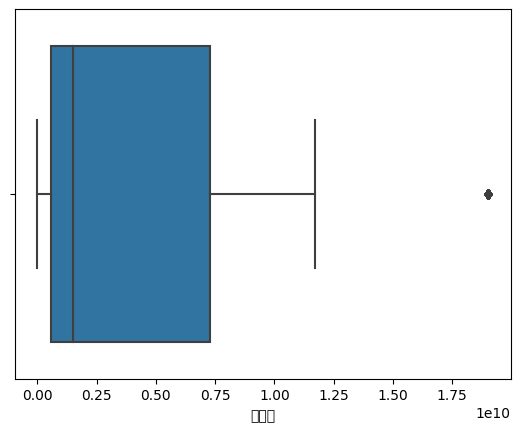

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=sdf_merged['매출액'])

In [ ]:
sdf_musical2 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', encoding='utf-8', usecols=['입장권고유번호', '예매건수', '취소건수', '공연횟수', '순예매건수'])
sdf_musical2

,입장권고유번호,예매건수,취소건수,공연횟수,순예매건수
0,W2279023752001,974,326,92,648
1,W2221045657001,974,326,92,648
2,W2280490992001,974,326,92,648
3,W2218597478001,974,326,92,648
4,W2229557520001,974,326,92,648
...,...,...,...,...,...
3621236,1438637626_1,11053,4715,24,6338
3621237,1438638029_1,11053,4715,24,6338
3621238,1438638506_1,11053,4715,24,6338
3621239,1438638607_1,11053,4715,24,6338


In [ ]:
sdf_merged_num = sdf_merged.merge(sdf_musical2, on='입장권고유번호', how='left')
sdf_merged_num

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연코드,소요시간,공연장코드,좌석수,공연장규모,매출액,예매건수,취소건수,공연횟수,순예매건수
0,W2279023752001,0,2,A,0,False,35500,0,26,0.0,...,PF307122,100.0,FC223099-02,264,1,26522150.0,974,326,92,648
1,W2221045657001,0,2,A,0,False,35500,0,26,0.0,...,PF307122,100.0,FC223099-02,264,1,26522150.0,974,326,92,648
2,W2280490992001,0,2,A,0,False,35500,0,26,0.0,...,PF307122,100.0,FC223099-02,264,1,26522150.0,974,326,92,648
3,W2218597478001,0,2,A,0,False,35500,0,26,0.0,...,PF307122,100.0,FC223099-02,264,1,26522150.0,974,326,92,648
4,W2229557520001,0,2,A,0,False,35500,0,26,0.0,...,PF307122,100.0,FC223099-02,264,1,26522150.0,974,326,92,648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618475,1438637626_1,0,4,B,2,False,46200,0,44,2078.0,...,PF425243,100.0,FC223487-01,433,2,156198850.0,11053,4715,24,6338
3618476,1438638029_1,0,4,B,2,False,33000,0,44,2078.0,...,PF425243,100.0,FC223487-01,433,2,156198850.0,11053,4715,24,6338
3618477,1438638506_1,0,4,B,2,False,33000,0,44,2078.0,...,PF425243,100.0,FC223487-01,433,2,156198850.0,11053,4715,24,6338
3618478,1438638607_1,0,4,B,2,False,46200,0,44,2078.0,...,PF425243,100.0,FC223487-01,433,2,156198850.0,11053,4715,24,6338


In [ ]:
sdf_merged_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618480 entries, 0 to 3618479
Data columns (total 46 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   성별        int64  
 5   단독판매여부    bool   
 6   예매금액      int64  
 7   취소금액      int64  
 8   교통개수      int64  
 9   팔로워합      float64
 10  수상실적개수    int64  
 11  좌석등급개수    int64  
 12  무대시설      int64  
 13  예매할인율     float64
 14  공연별전사코개수  int64  
 15  강수        float64
 16  기온        float64
 17  습도        float64
 18  공연시설인기    object 
 19  편의시설      int64  
 20  장애인시설     int64  
 21  주차시설      int64  
 22  세부장르명     object 
 23  아동공연 여부   bool   
 24  축제 여부     bool   
 25  내한공연 여부   bool   
 26  미세먼지등급    float64
 27  공연_요일     object 
 28  공연_평일주말   object 
 29  공연_월      int64  
 30  공연_오전오후   object 
 31  예매_요일     object 
 32  예매_평일주말   object 
 33  예매_월      int64  
 34  예매_오전오후   object 
 35  불쾌지수      float64
 36  공연코드    

In [ ]:
sdf_merged_num.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', encoding='utf-8-sig', index=False)

# 순예매좌석수와 출연진 인지도 척도(팔로워합)간의 상관성 확인

In [ ]:
del sdf_merged
del sdf_musical2
del sdf_merged_num

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sdf_merged = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', encoding='utf-8')
sdf_merged

,입장권고유번호,예매가능공연개수
0,W2279023752001,4.0
1,W2221045657001,4.0
2,W2280490992001,5.0
3,W2218597478001,5.0
4,W2229557520001,5.0
...,...,...
3617082,1438637626_1,11.0
3617083,1438638029_1,11.0
3617084,1438638506_1,11.0
3617085,1438638607_1,11.0


In [ ]:
sdf_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618480 entries, 0 to 3618479
Data columns (total 45 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   group     object 
 4   성별        int64  
 5   단독판매여부    bool   
 6   예매금액      int64  
 7   교통개수      int64  
 8   팔로워합      float64
 9   수상실적개수    int64  
 10  좌석등급개수    int64  
 11  무대시설      int64  
 12  예매할인율     float64
 13  공연별전사코개수  int64  
 14  강수        float64
 15  기온        float64
 16  습도        float64
 17  공연시설인기    object 
 18  편의시설      int64  
 19  장애인시설     int64  
 20  주차시설      int64  
 21  세부장르명     object 
 22  아동공연 여부   bool   
 23  축제 여부     bool   
 24  내한공연 여부   bool   
 25  미세먼지등급    float64
 26  공연_요일     object 
 27  공연_평일주말   object 
 28  공연_월      int64  
 29  공연_오전오후   object 
 30  예매_요일     object 
 31  예매_평일주말   object 
 32  예매_월      int64  
 33  불쾌지수      float64
 34  공연코드      object 
 35  소요시간      float64
 36  공연장코드   

In [ ]:
plot = sdf_merged[['공연코드','순예매건수','팔로워합']]
plot.drop_duplicates(subset='공연코드', inplace=True)
plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 3568343
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   공연코드    407 non-null    object 
 1   순예매건수   407 non-null    int64  
 2   팔로워합    407 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.7+ KB


<ipython-input-42-bd6a1e3b72d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot.drop_duplicates(subset='공연코드', inplace=True)


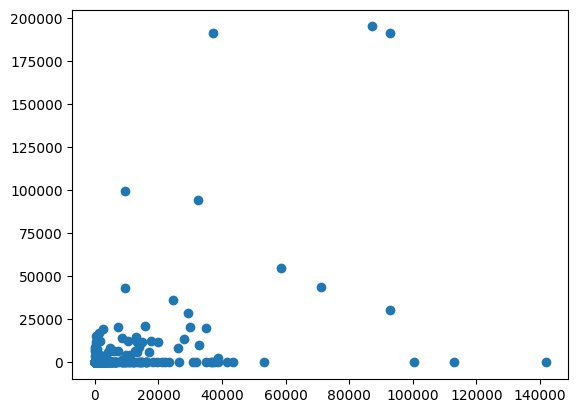

In [ ]:
plt.scatter(plot['순예매건수'], plot['팔로워합'])

In [ ]:
coco_clust = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/coco_clust_196719.csv', encoding='utf-8', usecols=['공연코드','출연진', '팔로워합'])
coco_clust

,공연코드,출연진,팔로워합
0,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
1,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
2,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
3,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
4,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
...,...,...,...
196714,PF426502,['전철민'],NaN
196715,PF426665,NaN,0.0
196716,PF426902,"['김선희', '김정원', '차정은', '허영훈']",NaN
196717,PF427510,NaN,0.0


In [ ]:
coco_clust.drop_duplicates(subset='공연코드', inplace=True)

In [ ]:
coco_clust

,공연코드,출연진,팔로워합
0,PF300001,"['김주헌', '성태준', '김동원', '장인섭', '김용준', '이종무', '류원준']",NaN
84,PF305057,"['김종구', '박민성', '조성윤', '강정우', '박정원', '유현석', '우원']",13067.0
197,PF301369,"최무인, 김동현, 오민석, 김수민, 이창민, 강기혁, 김동현",0.0
206,PF301683,"['전국향', '김정은', '하지희', '김채원', '황재희', '박문지', '이상숙']",NaN
223,PF300599,"['김찬호', '조성윤', '이동수', '박규연', '정민찬', '정원영', '김종구']",11797.0
...,...,...,...
196713,PF426502,['전철민'],NaN
196715,PF426665,NaN,0.0
196716,PF426902,"['김선희', '김정원', '차정은', '허영훈']",NaN
196717,PF427510,NaN,0.0


In [ ]:
plot['공연코드'].nunique()

407

In [ ]:
plot = plot.merge(coco_clust[['공연코드','출연진']], on='공연코드', how='left')
plot

,공연코드,순예매건수,팔로워합,출연진
0,PF307122,648,0.0,"최석진, 현석준, 홍승안, 주민진, 박정원, 손유동"
1,PF308078,7419,20613.0,"['송원근', '고훈정', '이충주', '정영주', '최현주', '홍륜희', '김찬호']"
2,PF305057,642,13067.0,"['김종구', '박민성', '조성윤', '강정우', '박정원', '유현석', '우원']"
3,PF300206,184,8726.0,"['이지훈', '조휘', '정동화', '신성민', '문진아', '김나영', '최지혜']"
4,PF309005,29,7910.0,"['정동화', '유승현', '한재아', '이경수', '김아선', '정명은', '조휘']"
...,...,...,...,...
402,PF426864,8,0.0,"정성모, 김범진, 배수진, 서미정, 김록현, 최기동"
403,PF423634,1021,0.0,NaN
404,PF424946,3371,0.0,전동석
405,PF425632,55,0.0,NaN


In [ ]:
# 콤마 개수를 세고 1을 더하는 함수 정의
def count_commas_and_add_one(value):
    if isinstance(value, str):  # 문자열인 경우에만 작동하도록 확인
        comma_count = value.count(',')
        return comma_count + 1
    else:
        return value  # 문자열이 아닌 경우 원래 값을 그대로 반환

# 새로운 열 추가
plot['출연진수'] = plot['출연진'].apply(count_commas_and_add_one)
plot

,공연코드,순예매건수,팔로워합,출연진,최대팔로워,출연진수
0,PF307122,648,0.0,"최석진, 현석준, 홍승안, 주민진, 박정원, 손유동",6.0,6.0
1,PF308078,7419,20613.0,"['송원근', '고훈정', '이충주', '정영주', '최현주', '홍륜희', '김찬호']",7.0,7.0
2,PF305057,642,13067.0,"['김종구', '박민성', '조성윤', '강정우', '박정원', '유현석', '우원']",7.0,7.0
3,PF300206,184,8726.0,"['이지훈', '조휘', '정동화', '신성민', '문진아', '김나영', '최지혜']",7.0,7.0
4,PF309005,29,7910.0,"['정동화', '유승현', '한재아', '이경수', '김아선', '정명은', '조휘']",7.0,7.0
...,...,...,...,...,...,...
402,PF426864,8,0.0,"정성모, 김범진, 배수진, 서미정, 김록현, 최기동",6.0,6.0
403,PF423634,1021,0.0,NaN,NaN,NaN
404,PF424946,3371,0.0,전동석,1.0,1.0
405,PF425632,55,0.0,NaN,NaN,NaN


# 순예매자수, 좌석점유율로 인기, 비인기 나누기

In [ ]:
import pandas as pd
sdf_merged_org = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical2.csv', encoding='utf-8')
sdf_merged_org

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,순예매건수,공연횟수,좌석점유율,공연일시,공연코드,총확진자,할인종류개수,결제수단코드,예매방식코드,할인종류코드
0,W2279023752001,0,2,A,0,False,35500,26,0.0,0,...,648,43,0.057082,2022-04-19 19:30:00,PF307122,3359097,7,5.0,2.0,99.0
1,W2221045657001,0,2,A,0,False,35500,26,0.0,0,...,648,43,0.057082,2022-04-19 19:30:00,PF307122,3359097,7,5.0,1.0,99.0
2,W2280490992001,0,2,A,0,False,35500,26,0.0,0,...,648,43,0.057082,2022-04-19 19:30:00,PF307122,3359097,7,5.0,2.0,99.0
3,W2218597478001,0,2,A,0,False,35500,26,0.0,0,...,648,43,0.057082,2022-04-19 19:30:00,PF307122,3359097,7,5.0,1.0,99.0
4,W2229557520001,0,2,A,0,False,35500,26,0.0,0,...,648,43,0.057082,2022-04-19 19:30:00,PF307122,3359097,7,5.0,2.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617082,1438637626_1,0,4,B,2,False,46200,44,2078.0,0,...,3939,24,0.379042,2022-12-31 22:20:00,PF425243,5663251,0,2.0,2.0,99.0
3617083,1438638029_1,0,4,B,2,False,33000,44,2078.0,0,...,3939,24,0.379042,2022-12-31 22:20:00,PF425243,5663251,0,2.0,2.0,99.0
3617084,1438638506_1,0,4,B,2,False,33000,44,2078.0,0,...,3939,24,0.379042,2022-12-31 22:20:00,PF425243,5663251,0,2.0,2.0,99.0
3617085,1438638607_1,0,4,B,2,False,46200,44,2078.0,0,...,3939,24,0.379042,2022-12-31 22:20:00,PF425243,5663251,0,99.0,2.0,99.0


In [ ]:
sdf_merged_org['수상실적개수'].describe()

count    3.617087e+06
mean     1.993936e-01
std      9.124723e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.000000e+00
Name: 수상실적개수, dtype: float64

In [ ]:
sdf_merged.drop_duplicates(inplace=True)
sdf_merged['예매점유율'] = (sdf_merged['순예매건수'] / sdf_merged['순예매건수'].sum()) * 100
sdf_merged = sdf_merged.sort_values(by='예매점유율', ascending=False)

In [ ]:
sdf_merged = sdf_merged.reset_index(drop=True)

,index,좌석수,공연장규모,순예매건수,공연횟수,좌석점유율,공연코드,회차별예매건수,회차별예매율,예매점유율
0,2284489,2400,4,141882,93,0.635672,PF316185,1525.612903,7.378792e-07,5.760931
1,778448,1255,4,112889,117,0.768815,PF313138,964.863248,4.666666e-07,4.583709
2,1613315,1766,4,100507,108,0.526965,PF316864,930.620370,4.501046e-07,4.080954
3,2075641,1242,4,92932,102,0.733573,PF317464,911.098039,4.406624e-07,3.773381
4,423421,2283,4,92744,53,0.766486,PF313940,1749.886792,8.463517e-07,3.765748
...,...,...,...,...,...,...,...,...,...,...
336,1829980,173,1,57,26,0.012672,PF319192,2.192308,1.060333e-09,0.002314
337,1337427,668,3,55,3,0.027445,PF315246,18.333333,8.867115e-09,0.002233
338,3543536,194,1,55,3,0.094502,PF425632,18.333333,8.867115e-09,0.002233
339,663497,160,1,51,62,0.005141,PF371936,0.822581,3.978500e-10,0.002071


In [ ]:
sdf_merged = sdf_merged.iloc[:,1:]
sdf_merged

,좌석수,공연장규모,순예매건수,공연횟수,좌석점유율,공연코드,회차별예매건수,회차별예매율,예매점유율
0,2400,4,141882,93,0.635672,PF316185,1525.612903,7.378792e-07,5.760931
1,1255,4,112889,117,0.768815,PF313138,964.863248,4.666666e-07,4.583709
2,1766,4,100507,108,0.526965,PF316864,930.620370,4.501046e-07,4.080954
3,1242,4,92932,102,0.733573,PF317464,911.098039,4.406624e-07,3.773381
4,2283,4,92744,53,0.766486,PF313940,1749.886792,8.463517e-07,3.765748
...,...,...,...,...,...,...,...,...,...
336,173,1,57,26,0.012672,PF319192,2.192308,1.060333e-09,0.002314
337,668,3,55,3,0.027445,PF315246,18.333333,8.867115e-09,0.002233
338,194,1,55,3,0.094502,PF425632,18.333333,8.867115e-09,0.002233
339,160,1,51,62,0.005141,PF371936,0.822581,3.978500e-10,0.002071


In [ ]:
sdf_merged.iloc[:9, -1].sum() #index 0부터 8까지

32.92978689971014

In [ ]:
sdf_merged.iloc[9:36, -1].sum() #index 9부터 35까지

33.07786851797789

In [ ]:
sdf_merged.iloc[36:, -1].sum() #index 36부터 340까지

33.99234458231198

In [ ]:
공연인기_상 = sdf_merged.iloc[:9, 5].to_list()
공연인기_중 = sdf_merged.iloc[9:36, 5].to_list()
공연인기_하 = sdf_merged.iloc[36:, 5].to_list()

In [ ]:
sdf_merged_상 = sdf_merged_org[sdf_merged_org.공연코드.isin(공연인기_상)]
sdf_merged_중 = sdf_merged_org[sdf_merged_org.공연코드.isin(공연인기_중)]
sdf_merged_하 = sdf_merged_org[sdf_merged_org.공연코드.isin(공연인기_하)]

In [ ]:
print(sdf_merged_상.shape, sdf_merged_중.shape, sdf_merged_하.shape)

(1179165, 51) (1225612, 51) (1212310, 51)


In [ ]:
sdf_merged_상.공연장규모.value_counts()

4    1179165
Name: 공연장규모, dtype: int64

In [ ]:
sdf_merged_중.공연장규모.value_counts()

4    587331
2    372030
3    241879
1     24372
Name: 공연장규모, dtype: int64

In [ ]:
sdf_merged_하.공연장규모.value_counts()

2    363152
3    351328
1    307892
4    189229
0       709
Name: 공연장규모, dtype: int64

In [ ]:
sdf_merged_상.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv', encoding='utf-8-sig', index=False)
sdf_merged_중.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv', encoding='utf-8-sig', index=False)
sdf_merged_하.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv', encoding='utf-8-sig', index=False)

<Axes: xlabel='공연장규모', ylabel='회차별예매건수'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  func(*

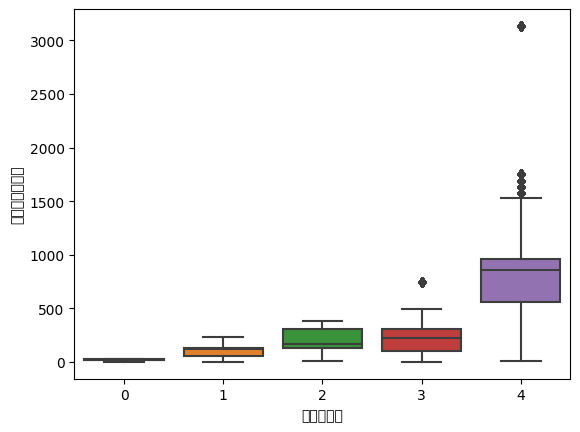

In [ ]:
import seaborn as sns
sdf_merged['회차별예매건수'] = sdf_merged['순예매건수'] / sdf_merged['공연횟수']
sns.boxplot(data=sdf_merged, y='회차별예매건수', x='공연장규모')

In [ ]:
sdf_merged['공연장규모'].value_counts()

4    1955725
2     735182
3     593207
1     332264
0        709
Name: 공연장규모, dtype: int64

In [ ]:
sdf_merged['회차별예매율'] = sdf_merged['회차별예매건수'] / sdf_merged['회차별예매건수'].sum()

In [ ]:
sdf_merged['회차별예매율'].describe()

count    3.617087e+06
mean     2.764656e-07
std      2.455416e-07
min      3.143795e-10
25%      8.278041e-08
50%      1.705657e-07
75%      4.320389e-07
max      1.516760e-06
Name: 회차별예매율, dtype: float64

<Axes: xlabel='회차별예매율', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*ar

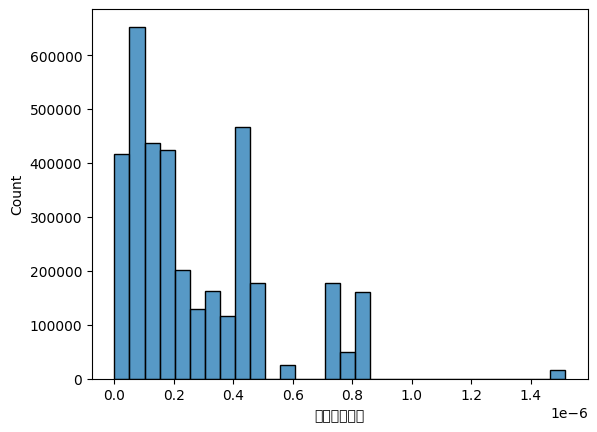

In [ ]:
sns.histplot(data=sdf_merged, x='회차별예매율', bins=30)

In [ ]:
sdf_merged = sdf_merged[['공연코드','순예매건수', '공연횟수', '좌석수', '좌석점유율']].drop_duplicates()
sdf_merged

,공연코드,순예매건수,공연횟수,좌석수,좌석점유율
0,PF307122,648,43,264,0.057082
6,PF308078,7419,63,702,0.167752
9,PF305057,642,40,365,0.043973
11,PF300206,184,18,1004,0.010181
37,PF308823,4151,52,352,0.226781
...,...,...,...,...,...
3398030,PF310646,521,2,494,0.527328
3441930,PF426971,102,2,144,0.354167
3502815,PF423634,1021,5,733,0.278581
3525825,PF424946,3371,2,2036,0.827849


In [ ]:
sdf_merged['좌석대비순예매'] = sdf_merged['순예매건수'] / sdf_merged['좌석수']

<Axes: xlabel='순예매건수', ylabel='좌석수'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  func(*arg

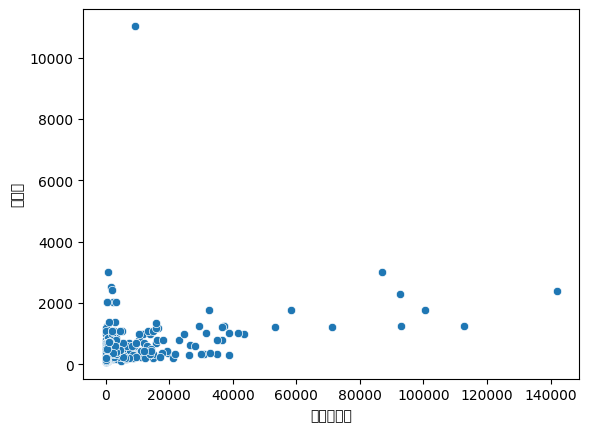

In [ ]:
import seaborn as sns
sns.scatterplot(x=sdf_merged['순예매건수'], y=sdf_merged['좌석수'])

In [ ]:
sdf_merged['평균순예매건수'] = sdf_merged['순예매건수'] / sdf_merged['공연횟수']
sdf_merged

,공연코드,순예매건수,공연횟수,좌석점유율,평균순예매건수
0,PF307122,648,43,0.057082,15.069767
6,PF308078,7419,63,0.167752,117.761905
9,PF305057,642,40,0.043973,16.050000
11,PF300206,184,18,0.010181,10.222222
37,PF308823,4151,52,0.226781,79.826923
...,...,...,...,...,...
3398030,PF310646,521,2,0.527328,260.500000
3441930,PF426971,102,2,0.354167,51.000000
3502815,PF423634,1021,5,0.278581,204.200000
3525825,PF424946,3371,2,0.827849,1685.500000


<Axes: xlabel='평균순예매건수', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func

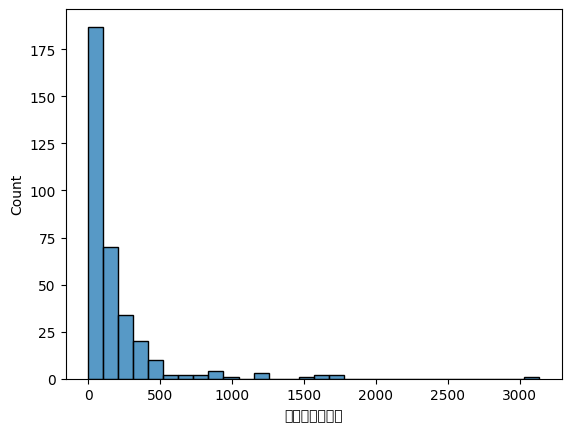

In [ ]:
import seaborn as sns
sns.histplot(x=sdf_merged['평균순예매건수'], bins=30)

<Axes: xlabel='곱하기', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44273 (\N{HANGUL SYLLABLE GOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLL

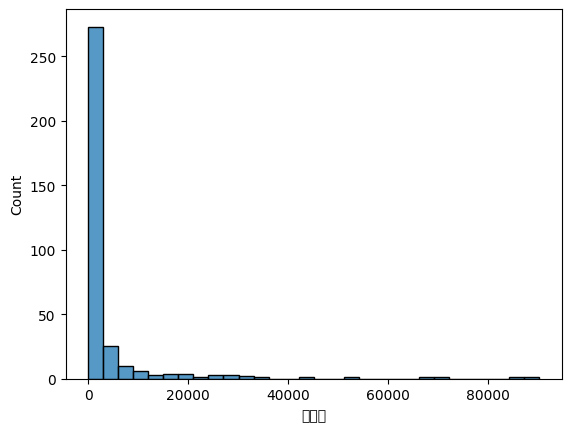

In [ ]:
sdf_merged['곱하기'] = sdf_merged['순예매건수'] * sdf_merged['좌석점유율']
sns.histplot(x=sdf_merged['곱하기'], bins=30)

In [ ]:
sdf_merged['순예매율'] = sdf_merged['순예매건수'] / sdf_merged['순예매건수'].sum()
sdf_merged

,공연코드,순예매건수,공연횟수,좌석점유율,평균순예매건수,순예매율
0,PF307122,648,43,0.057082,15.069767,0.000263
6,PF308078,7419,63,0.167752,117.761905,0.003012
9,PF305057,642,40,0.043973,16.050000,0.000261
11,PF300206,184,18,0.010181,10.222222,0.000075
37,PF308823,4151,52,0.226781,79.826923,0.001685
...,...,...,...,...,...,...
3398030,PF310646,521,2,0.527328,260.500000,0.000212
3441930,PF426971,102,2,0.354167,51.000000,0.000041
3502815,PF423634,1021,5,0.278581,204.200000,0.000415
3525825,PF424946,3371,2,0.827849,1685.500000,0.001369


<Axes: xlabel='순예매건수'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.

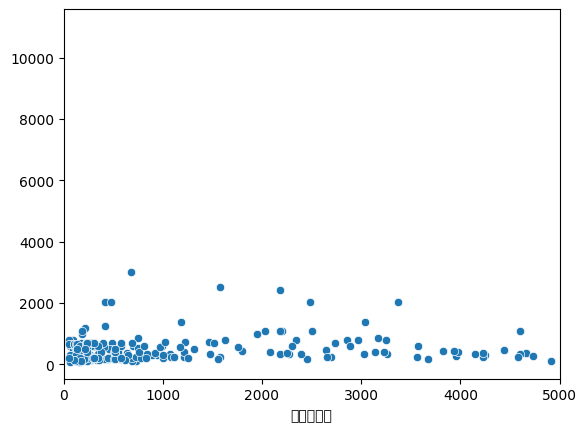

In [ ]:
import matplotlib.pyplot as plt

plt.xlim((0,5000))
sns.scatterplot(x=sdf_merged['순예매건수'], y= sdf_merged['순예매건수'] / sdf_merged['좌석점유율'] / sdf_merged['공연횟수'])

<Axes: xlabel='순예매율', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing fro

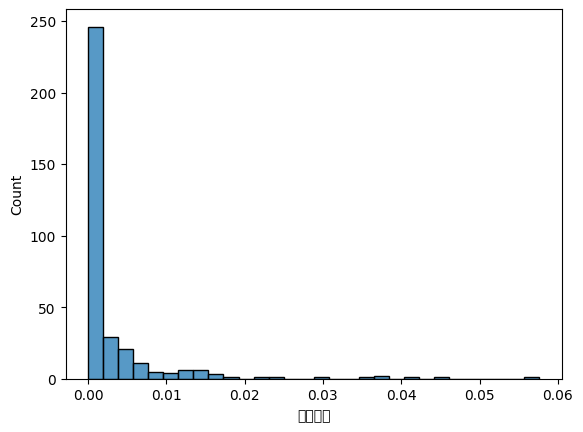

In [ ]:
sns.histplot(x=sdf_merged['순예매율'], bins=30)

In [ ]:
sdf_merged['순예매율'].describe()

count    341.000000
mean       0.002933
std        0.006782
min        0.000020
25%        0.000095
50%        0.000339
75%        0.002485
max        0.057609
Name: 순예매율, dtype: float64

In [ ]:
sdf_merged['곱하기'].describe()

count      341.000000
mean      3673.269530
std      10647.732911
min          0.221828
25%         23.449097
50%        224.271502
75%       2247.176357
max      90190.420806
Name: 곱하기, dtype: float64

In [ ]:
sdf_merged.describe()

,순예매건수,좌석점유율
count,341.000000,341.000000
mean,7222.378299,0.289890
std,16703.645342,0.251894
min,50.000000,0.003681
25%,235.000000,0.082090
50%,836.000000,0.224382
75%,6119.000000,0.434110
max,141882.000000,0.994961


<Axes: xlabel='좌석점유율', ylabel='Count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  func(*arg

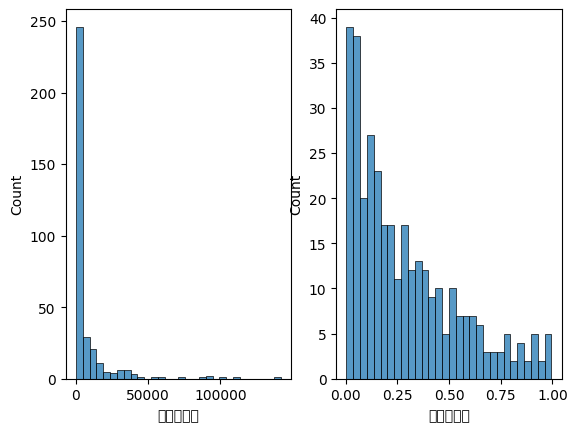

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(121)
sns.histplot(x=sdf_merged['순예매건수'], bins=30)

plt.subplot(122)
sns.histplot(x=sdf_merged['좌석점유율'], bins=30)

In [ ]:
df1 = sdf_merged.drop('좌석점유율', axis=1)
df2 = sdf_merged.drop('순예매건수', axis=1)

In [ ]:
df1 = df1.sort_values(by='순예매건수', ascending=False)
df2 = df2.sort_values(by='좌석점유율', ascending=False)

In [ ]:
df1

,공연코드,순예매건수
2284489,PF316185,141882
778448,PF313138,112889
1613315,PF316864,100507
2075641,PF317464,92932
423421,PF313940,92744
...,...,...
1829980,PF319192,57
1337427,PF315246,55
3543536,PF425632,55
663497,PF371936,51


In [ ]:
df2

,공연코드,좌석점유율
24290,PF301099,0.994961
941437,PF316620,0.986060
2750131,PF433738,0.980000
1297683,PF316005,0.975397
416722,PF314676,0.970373
...,...,...
89,PF308722,0.004678
89139,PF312246,0.004437
18257,PF300075,0.003975
1455452,PF317858,0.003693


In [ ]:
df1_50 = df1[df1.순예매건수 >= df1.순예매건수.median()]
df2_50 = df2[df2.좌석점유율 >= df2.좌석점유율.median()]

In [ ]:
df1_50

,공연코드,순예매건수
2284489,PF316185,141882
778448,PF313138,112889
1613315,PF316864,100507
2075641,PF317464,92932
423421,PF313940,92744
...,...,...
3338180,PF311538,973
434330,PF313786,946
2002323,PF310383,919
1467367,PF316399,887


In [ ]:
df2_50

,공연코드,좌석점유율
24290,PF301099,0.994961
941437,PF316620,0.986060
2750131,PF433738,0.980000
1297683,PF316005,0.975397
416722,PF314676,0.970373
...,...,...
1148,PF308647,0.227682
37,PF308823,0.226781
361156,PF313911,0.226601
567579,PF315841,0.226293


In [ ]:
상위그룹 = pd.merge(df1_50, df2_50, on='공연코드', how='inner')['공연코드'].to_list()

In [ ]:
df1_under_50 = df1[df1.순예매건수 < df1.순예매건수.median()]
df2_under_50 = df2[df2.좌석점유율 < df2.좌석점유율.median()]
하위그룹 = pd.merge(df1_under_50, df2_under_50, on='공연코드', how='inner')['공연코드'].to_list()

In [ ]:
df1_under_50

,공연코드,순예매건수
3073237,PF423345,828
3171901,PF423539,809
2689263,PF423813,785
2102464,PF319374,783
3170247,PF425164,756
...,...,...
1829980,PF319192,57
1337427,PF315246,55
3543536,PF425632,55
663497,PF371936,51


In [ ]:
sdf_merged[sdf_merged['공연코드'].isin(상위그룹)].순예매건수.sum()

2165711

In [ ]:
sdf_merged[sdf_merged['공연코드'].isin(하위그룹)].순예매건수.sum()

32930

In [ ]:
sdf_merged['순예매건수'].sum()-2165711-32930

264190

# 입장권고유번호별 예매할인율 다시 계산

In [ ]:
del sdf_merged_상
del sdf_merged_중
del sdf_merged_하

In [ ]:
sdf_merged_상 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv', encoding='utf-8')
sdf_merged_중 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_B.csv', encoding='utf-8')
sdf_merged_하 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_C.csv', encoding='utf-8')

In [ ]:
pivot_df_all = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/pivot_df.csv', encoding='utf-8', usecols=['입장권고유번호', '할인율'])

In [ ]:
pivot_df_all.loc[pivot_df_all['할인율'].isna(),'할인율']=0

In [ ]:
#인기 상 그룹
sdf_merged_상.drop('예매할인율', axis=1, inplace=True)
sdf_merged_상 = sdf_merged_상.merge(pivot_df_all, on='입장권고유번호', how='left')

#인기 중 그룹
sdf_merged_중.drop('예매할인율', axis=1, inplace=True)
sdf_merged_중 = sdf_merged_중.merge(pivot_df_all, on='입장권고유번호', how='left')

#인기 하 그룹
sdf_merged_하.drop('예매할인율', axis=1, inplace=True)
sdf_merged_하 = sdf_merged_하.merge(pivot_df_all, on='입장권고유번호', how='left')

In [ ]:
print(sdf_merged_상.shape, sdf_merged_중.shape, sdf_merged_하.shape)

(1179165, 51) (1225612, 51) (1212310, 51)


In [ ]:
sdf_merged_상.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179165 entries, 0 to 1179164
Data columns (total 51 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   수상실적개수    1179165 non-null  int64  
 10  좌석등급개수    1179165 non-null  int64  
 11  무대시설      1179165 non-null  int64  
 12  공연별전사코개수  1179165 non-null  int64  
 13  강수        1179165 non-null  float64
 14  기온        1179165 non-null  float64
 15  습도        1179165 non-null  float64
 16  공연시설인기    1179165 non-null  object 
 17  편의시설      1179165 non-null  int64  
 18  장애인시설     1179165 non-null  int64  
 19  주차시설      1179165 non

In [ ]:
print(sdf_merged_상['할인율'].isna().sum(), sdf_merged_중['할인율'].isna().sum(), sdf_merged_하['할인율'].isna().sum())

0 0 0


In [ ]:
sdf_merged_상.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_A.csv', encoding='utf-8-sig', index=False)
sdf_merged_중.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_B.csv', encoding='utf-8-sig', index=False)
sdf_merged_하.to_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_C.csv', encoding='utf-8-sig', index=False)

# sdf_musical_A 파생변수 통계량 살펴보기

In [ ]:
import pandas as pd
sdf_musical_A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_A_new.csv', encoding='utf-8')
sdf_musical_A

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,좌석등급개수,...,공연횟수,좌석점유율,할인종류개수,결제수단코드,예매방식코드,할인율,일일확진자,예매가능공연개수,공-예,시설합
0,1267745010KDPT,0,20,A,0,False,42000,14,54964.0,4,...,104,0.318304,1,2.0,2.0,0.066667,2901,8.0,20,8
1,2511668010YFPT,0,20,A,0,False,45000,14,54964.0,4,...,104,0.318304,1,2.0,2.0,0.000000,2901,8.0,20,8
2,2898520110FHPT,0,20,A,0,False,45000,14,54964.0,4,...,104,0.318304,1,2.0,2.0,0.000000,2901,8.0,20,8
3,5485585400JSPT,0,20,A,0,False,42000,14,54964.0,4,...,104,0.318304,1,5.0,2.0,0.066667,2901,8.0,20,8
4,5440585910YHPT,0,20,A,0,False,72000,14,54964.0,4,...,104,0.318304,1,99.0,2.0,0.040000,2901,8.0,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179160,462440043846226,0,13,A,0,False,42000,1,0.0,6,...,93,0.635672,1,2.0,4.0,0.000000,11593,12.0,13,3
1179161,462439543846222,0,13,A,0,False,42000,1,0.0,6,...,93,0.635672,1,2.0,4.0,0.000000,11593,12.0,13,3
1179162,462439543846223,0,13,A,0,False,42000,1,0.0,6,...,93,0.635672,1,2.0,4.0,0.000000,11593,12.0,13,3
1179163,4626417438462300005,0,10,A,0,False,84000,1,0.0,6,...,93,0.635672,1,2.0,4.0,0.000000,11593,11.0,10,3


In [ ]:
sdf_musical_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179165 entries, 0 to 1179164
Data columns (total 35 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   좌석등급개수    1179165 non-null  int64  
 10  공연별전사코개수  1179165 non-null  int64  
 11  강수        1179165 non-null  float64
 12  공연시설인기    1179165 non-null  object 
 13  세부장르명     1179165 non-null  object 
 14  미세먼지등급    1179165 non-null  float64
 15  공연_요일     1179165 non-null  object 
 16  공연_평일주말   1179165 non-null  object 
 17  공연_월      1179165 non-null  int64  
 18  예매_요일     1179165 non-null  object 
 19  예매_평일주말   1179165 non

In [ ]:
# 범주형 변수 통계량 DF
dataframes = {
    'group': sdf_musical_A['group'].value_counts(),
    '성별': sdf_musical_A['성별'].value_counts(),
    '단독판매여부': sdf_musical_A['단독판매여부'].value_counts(),
    '공연시설인기': sdf_musical_A['공연시설인기'].value_counts(),
    '세부장르명': sdf_musical_A['세부장르명'].value_counts(),
    '미세먼지등급': sdf_musical_A['미세먼지등급'].value_counts(),
    '공연_요일': sdf_musical_A['공연_요일'].value_counts(),
    '공연_평일주말': sdf_musical_A['공연_평일주말'].value_counts(),
    '공연_월': sdf_musical_A['공연_월'].value_counts(),
    '예매_요일': sdf_musical_A['예매_요일'].value_counts(),
    '예매_평일주말': sdf_musical_A['예매_평일주말'].value_counts(),
    '예매_월': sdf_musical_A['예매_월'].value_counts(),
    '결제수단코드': sdf_musical_A['결제수단코드'].value_counts(),
    '예매방식코드': sdf_musical_A['예매방식코드'].value_counts()
}

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for name, df in dataframes.items():
    if '요일' in name:  # 키(key)에 '요일'이 포함되어 있으면 열 순서를 변경
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T[day_order])
    else:
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T.sort_index(axis=1))
    print("\n")

Dataframe for group:


,A,B,C,D,E
group,131079,267861,383636,371211,25378




Dataframe for 성별:


,0,1,2
성별,354154,177090,647921




Dataframe for 단독판매여부:


,False,True
단독판매여부,1001223,177942




Dataframe for 공연시설인기:


,A,B,C
공연시설인기,459223,588514,131428




Dataframe for 세부장르명:


,넌버벌 퍼포먼스,뮤지컬
세부장르명,177218,1001947




Dataframe for 미세먼지등급:


,0.0,1.0,2.0
미세먼지등급,715210,452632,11323




Dataframe for 공연_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
공연_요일,27615,97978,197067,125998,185106,290428,254973




Dataframe for 공연_평일주말:


,주말,평일
공연_평일주말,545401,633764




Dataframe for 공연_월:


,5,6,7,8,9,10,11,12
공연_월,267,65593,286086,178878,151604,217934,144325,134478




Dataframe for 예매_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
예매_요일,140443,251866,195179,183161,194100,110122,104294




Dataframe for 예매_평일주말:


,주말,평일
예매_평일주말,214416,964749




Dataframe for 예매_월:


,4,5,6,7,8,9,10,11,12
예매_월,12999,113060,186377,242638,160784,179029,131889,95032,57357




Dataframe for 결제수단코드:


,1.0,2.0,3.0,4.0,5.0,99.0
결제수단코드,163910,582872,14,255710,26207,150452




Dataframe for 예매방식코드:


,1.0,2.0,3.0,4.0,99.0
예매방식코드,403837,337998,175830,17413,244087


In [ ]:
#연속형 변수 통계량 DF
cols = ['좌석수', '시설합', '소요시간', '팔로워합', '매출액', '좌석등급개수', '공연별전사코개수', '공연횟수', '좌석점유율', '예매가능공연개수', '예매금액', '할인율', '할인종류개수', '공-예', '강수', '불쾌지수', '교통개수', '일일확진자']
df = pd.DataFrame()

pd.set_option('display.float_format', '{:.2f}'.format)  # 숫자를 소수점 2자리까지 표현

for name in cols:
  df = pd.concat([df, pd.DataFrame(sdf_musical_A[name].describe()).T], axis=0)

df.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
좌석수,1836.46,612.78,1230.00,1242.00,1766.00,2400.00,3022.00
시설합,7.08,2.95,3.00,4.00,8.00,8.00,12.00
소요시간,158.93,14.91,130.00,155.00,160.00,170.00,180.00
팔로워합,57351.12,78194.41,0.00,0.00,30551.00,54964.00,195312.00
매출액,10350968404.74,4223071815.81,5299660720.00,7298542500.00,9530496300.00,11711579100.00,19026325660.00
좌석등급개수,4.30,1.17,1.00,4.00,4.00,5.00,6.00
공연별전사코개수,3.27,0.65,2.00,3.00,3.00,4.00,4.00
공연횟수,96.43,18.80,53.00,93.00,102.00,108.00,117.00
좌석점유율,0.60,0.17,0.29,0.53,0.64,0.77,0.77
예매가능공연개수,81.97,31.47,0.00,75.00,95.00,103.00,116.00


In [ ]:
sdf_musical_A['공연장코드'].value_counts()

FC222253-01    211360
FC222234-01    199030
FC222236-02    178124
FC223059-08    177218
FC222223-06    158183
FC222233-01    131428
FC222242-01    123822
Name: 공연장코드, dtype: int64

In [ ]:
sdf_musical_A['편의시설'].value_counts()

2    388578
1    199030
3    178124
5    158183
4    131428
0    123822
Name: 편의시설, dtype: int64

In [ ]:
sdf_musical_A['장애인시설'].value_counts()

3    520912
2    322852
1    177218
4    158183
Name: 장애인시설, dtype: int64

In [ ]:
sdf_musical_A['무대시설'].value_counts()

2    500976
3    500971
0    177218
Name: 무대시설, dtype: int64

In [ ]:
sdf_musical_A[sdf_musical_A['내한공연 여부'] == True]['공연장코드'].unique()

array(['FC223059-08'], dtype=object)

In [ ]:
sdf_musical_A[sdf_musical_A['내한공연 여부'] == True]['공연코드'].unique()

array(['PF316185'], dtype=object)

In [ ]:
sdf_musical_B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_B.csv', encoding='utf-8')
sdf_musical_C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Colab/서민지/sdf_musical_C.csv', encoding='utf-8')

In [ ]:
sdf_musical_B['축제 여부'].value_counts(dropna=False)

False    1225612
Name: 축제 여부, dtype: int64

In [ ]:
sdf_musical_C['축제 여부'].value_counts(dropna=False)

False    1205619
True        6691
Name: 축제 여부, dtype: int64

In [ ]:
sdf_musical_B['아동공연 여부'].value_counts(dropna=False)

False    1037045
True      188567
Name: 아동공연 여부, dtype: int64

In [ ]:
sdf_musical_C['아동공연 여부'].value_counts(dropna=False)

False    828462
True     383848
Name: 아동공연 여부, dtype: int64

In [ ]:
sdf_musical_B['주차시설'].value_counts(dropna=False)

1    1202069
0      23543
Name: 주차시설, dtype: int64

In [ ]:
sdf_musical_C['주차시설'].value_counts(dropna=False)

1    1136869
0      66889
2       8552
Name: 주차시설, dtype: int64

In [13]:
수상실적 = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/2022/2022_수상실적개수.csv', encoding='utf-8', index_col=0)
수상실적

,공연코드,공연일시,수상실적
0,PF306057,2022-01-01 10:30,NaN
1,PF303848,2022-01-01 11:00,NaN
2,PF304598,2022-01-01 11:00,NaN
3,PF304053,2022-01-01 11:00,NaN
4,PF391432,2022-01-01 11:00,NaN
...,...,...,...
97617,PF425870,2022-12-31 21:50,NaN
97618,PF424726,2022-12-31 22:00,NaN
97619,PF424996,2022-12-31 22:00,NaN
97620,PF425243,2022-12-31 22:20,NaN


In [14]:
수상실적.수상실적.value_counts(dropna=False)

NaN    95788
3.0      762
1.0      497
6.0      363
2.0      151
4.0       47
5.0       11
7.0        3
Name: 수상실적, dtype: int64

In [15]:
수상실적.공연코드.nunique()

17930

In [22]:
sdf_musical_A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical_A.csv', encoding='utf-8')
sdf_musical_A

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,공연일시,공연코드,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공-예
0,1267745010KDPT,0,20,A,0,False,42000,14,54964.0,0,...,2022-05-22 14:00:00,PF308077,1,2.0,2.0,99.0,0.066667,2901,8.0,20
1,2511668010YFPT,0,20,A,0,False,45000,14,54964.0,0,...,2022-05-22 14:00:00,PF308077,1,2.0,2.0,99.0,0.000000,2901,8.0,20
2,2898520110FHPT,0,20,A,0,False,45000,14,54964.0,0,...,2022-05-22 14:00:00,PF308077,1,2.0,2.0,99.0,0.000000,2901,8.0,20
3,5485585400JSPT,0,20,A,0,False,42000,14,54964.0,0,...,2022-05-22 14:00:00,PF308077,1,5.0,2.0,99.0,0.066667,2901,8.0,20
4,5440585910YHPT,0,20,A,0,False,72000,14,54964.0,0,...,2022-05-22 14:00:00,PF308077,1,99.0,2.0,99.0,0.040000,2901,8.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179160,462440043846226,0,13,A,0,False,42000,1,0.0,0,...,2022-12-31 19:30:00,PF316185,1,2.0,4.0,99.0,0.000000,11593,12.0,13
1179161,462439543846222,0,13,A,0,False,42000,1,0.0,0,...,2022-12-31 19:30:00,PF316185,1,2.0,4.0,99.0,0.000000,11593,12.0,13
1179162,462439543846223,0,13,A,0,False,42000,1,0.0,0,...,2022-12-31 19:30:00,PF316185,1,2.0,4.0,99.0,0.000000,11593,12.0,13
1179163,4626417438462300005,0,10,A,0,False,84000,1,0.0,0,...,2022-12-31 19:30:00,PF316185,1,2.0,4.0,99.0,0.000000,11593,11.0,10


In [27]:
sdf_muscial_A_1 = sdf_musical_A.drop('수상실적개수', axis=1)

In [33]:
df = pd.merge(sdf_muscial_A_1, 수상실적, on=('공연코드','공연일시'), how='left')
df['수상실적'].value_counts(dropna=False)

NaN    1179165
Name: 수상실적, dtype: int64

# sdf_musical_B 파생변수 통계량 살펴보기

In [ ]:
import pandas as pd
sdf_musical_B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_B_new.csv', encoding='utf-8')
sdf_musical_B

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,좌석점유율,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공-예,시설합
0,W2238626218001,0,2,A,0,False,29400,19,0.0,0,...,0.120548,0,2.0,2.0,99.0,0.000000,13184,11.0,2,3
1,W2238626218002,0,2,A,0,False,29400,19,0.0,0,...,0.120548,0,2.0,2.0,99.0,0.000000,13184,11.0,2,3
2,W2226508540001,0,2,A,0,False,29400,19,0.0,0,...,0.120548,0,2.0,2.0,99.0,0.000000,13184,12.0,2,3
3,W2244344907001,0,3,A,0,False,24400,19,0.0,0,...,0.116547,3,5.0,2.0,99.0,0.170068,12329,11.0,3,3
4,W2244344907002,0,3,A,0,False,29400,19,0.0,0,...,0.116547,3,5.0,2.0,99.0,0.000000,12329,11.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225607,T2091174540,0,35,D,2,True,180000,14,94415.0,0,...,0.922848,0,2.0,2.0,99.0,0.000000,11593,88.0,35,8
1225608,T2091229050,0,35,D,2,True,171000,14,94415.0,0,...,0.922848,0,2.0,2.0,99.0,0.000000,11593,87.0,35,8
1225609,T2091261210,1,19,D,0,True,90000,14,94415.0,0,...,0.922848,0,2.0,1.0,99.0,0.000000,11593,87.0,35,8
1225610,T2091291630,0,35,D,2,True,84000,14,94415.0,0,...,0.922848,0,2.0,2.0,99.0,0.000000,11593,87.0,35,8


In [ ]:
sdf_musical_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225612 entries, 0 to 1225611
Data columns (total 39 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1225612 non-null  object 
 1   delta     1225612 non-null  int64  
 2   y         1225612 non-null  int64  
 3   group     1225612 non-null  object 
 4   성별        1225612 non-null  int64  
 5   단독판매여부    1225612 non-null  bool   
 6   예매금액      1225612 non-null  int64  
 7   교통개수      1225612 non-null  int64  
 8   팔로워합      1225612 non-null  float64
 9   수상실적개수    1225612 non-null  int64  
 10  공연별전사코개수  1225612 non-null  int64  
 11  강수        1225612 non-null  float64
 12  공연시설인기    1225612 non-null  object 
 13  주차시설      1225612 non-null  int64  
 14  아동공연 여부   1225612 non-null  bool   
 15  미세먼지등급    1225612 non-null  float64
 16  공연_요일     1225612 non-null  object 
 17  공연_평일주말   1225612 non-null  object 
 18  공연_월      1225612 non-null  int64  
 19  공연_오전오후   1225612 non

In [ ]:
# 범주형 변수 통계량 DF
dataframes = {
    '공연시설인기': sdf_musical_B['공연시설인기'].value_counts(),
    '단독판매여부': sdf_musical_B['단독판매여부'].value_counts(),
    '공연_요일': sdf_musical_B['공연_요일'].value_counts(),
    '공연_평일주말': sdf_musical_B['공연_평일주말'].value_counts(),
    '공연_월': sdf_musical_B['공연_월'].value_counts(),
    '공연_오전오후': sdf_musical_B['공연_오전오후'].value_counts(),
    '아동공연 여부': sdf_musical_B['아동공연 여부'].value_counts(),
    'group': sdf_musical_B['group'].value_counts(),
    '성별': sdf_musical_B['성별'].value_counts(),
    '예매_요일': sdf_musical_B['예매_요일'].value_counts(),
    '예매_평일주말': sdf_musical_B['예매_평일주말'].value_counts(),
    '예매_월': sdf_musical_B['예매_월'].value_counts(),
    '결제수단코드': sdf_musical_B['결제수단코드'].value_counts(),
    '예매방식코드': sdf_musical_B['예매방식코드'].value_counts(),
    '할인종류코드': sdf_musical_B['할인종류코드'].value_counts(),
    '미세먼지등급': sdf_musical_B['미세먼지등급'].value_counts(),
}

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for name, df in dataframes.items():
    if '요일' in name:  # 키(key)에 '요일'이 포함되어 있으면 열 순서를 변경
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T[day_order])
    else:
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T.sort_index(axis=1))
    print("\n")

Dataframe for 공연시설인기:


,A,B,C,D
공연시설인기,55985,279844,673884,215899




Dataframe for 단독판매여부:


,False,True
단독판매여부,858922,366690




Dataframe for 공연_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
공연_요일,26486,100334,191947,141493,173671,312639,279042




Dataframe for 공연_평일주말:


,주말,평일
공연_평일주말,591681,633931




Dataframe for 공연_월:


,4,5,6,7,8,9,10,11,12
공연_월,148,26336,111455,176557,183579,123679,103608,149822,350428




Dataframe for 공연_오전오후:


,오전,오후
공연_오전오후,93402,1132210




Dataframe for 아동공연 여부:


,False,True
아동공연 여부,1037045,188567




Dataframe for group:


,A,B,C,D,E
group,191510,303204,368973,356184,5741




Dataframe for 성별:


,0,1,2
성별,350269,112021,763322




Dataframe for 예매_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
예매_요일,176338,177128,189334,220911,237165,121351,103385




Dataframe for 예매_평일주말:


,주말,평일
예매_평일주말,224736,1000876




Dataframe for 예매_월:


,4,5,6,7,8,9,10,11,12
예매_월,38418,98056,124639,167144,157091,141968,200835,189513,107948




Dataframe for 결제수단코드:


,1.00,2.00,3.00,4.00,5.00,99.00
결제수단코드,230922,506236,10,212827,68762,206855




Dataframe for 예매방식코드:


,1.00,2.00,3.00,4.00,99.00
예매방식코드,403347,393949,231010,6543,190763




Dataframe for 할인종류코드:


,1.00,4.00,99.00
할인종류코드,3394,241,1221977




Dataframe for 미세먼지등급:


,0.00,1.00,2.00,3.00
미세먼지등급,696907,519554,8553,598


In [ ]:
#연속형 변수 통계량 DF
cols = ['좌석수', '시설합', '주차시설', '소요시간', '팔로워합', '수상실적개수', '매출액', '공연별전사코개수', '공연횟수', '순예매건수', '좌석점유율', '예매가능공연개수', '예매금액', '할인율', '할인종류개수', '공-예', '강수', '불쾌지수', '교통개수', '일일확진자']
df = pd.DataFrame()

pd.set_option('display.float_format', '{:.2f}'.format)  # 숫자를 소수점 2자리까지 표현

for name in cols:
  df = pd.concat([df, pd.DataFrame(sdf_musical_B[name].describe()).T], axis=0)

df.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
좌석수,821.71,405.37,210.00,365.00,805.00,1230.00,1766.00
시설합,5.31,3.44,0.00,2.00,5.00,8.00,11.00
주차시설,0.98,0.14,0.00,1.00,1.00,1.00,1.00
소요시간,128.23,35.40,60.00,110.00,140.00,160.00,170.00
팔로워합,17811.51,42462.54,0.00,0.00,0.00,13452.00,191402.00
수상실적개수,0.49,1.46,0.00,0.00,0.00,0.00,6.00
매출액,2191267144.04,1414613719.84,622222457.00,1119906486.00,1458158900.00,3437489500.00,4597078000.00
공연별전사코개수,3.50,1.35,1.00,3.00,3.00,4.00,7.00
공연횟수,115.50,93.85,20.00,60.00,86.00,106.00,381.00
순예매건수,32287.82,6965.76,17700.00,26488.00,34964.00,37330.00,43531.00


# sdf_musical_C 파생변수 통계량 살펴보기

In [ ]:
import pandas as pd
sdf_musical_C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_C_new.csv', encoding='utf-8')
sdf_musical_C

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,좌석점유율,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공-예,시설합
0,W2279023752001,0,2,A,0,False,35500,26,0.00,0,...,0.06,7,5.00,2.00,99.00,0.08,21806,4.00,2,4
1,W2221045657001,0,2,A,0,False,35500,26,0.00,0,...,0.06,7,5.00,1.00,99.00,0.08,21806,4.00,2,4
2,W2280490992001,0,2,A,0,False,35500,26,0.00,0,...,0.06,7,5.00,2.00,99.00,0.08,21806,5.00,2,4
3,W2218597478001,0,2,A,0,False,35500,26,0.00,0,...,0.06,7,5.00,1.00,99.00,0.08,21806,5.00,2,4
4,W2229557520001,0,2,A,0,False,35500,26,0.00,0,...,0.06,7,5.00,2.00,99.00,0.08,21806,5.00,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196002,1438637626_1,0,4,B,2,False,46200,44,2078.00,0,...,0.38,0,2.00,2.00,99.00,0.00,11593,11.00,4,2
1196003,1438638029_1,0,4,B,2,False,33000,44,2078.00,0,...,0.38,0,2.00,2.00,99.00,0.00,11593,11.00,4,2
1196004,1438638506_1,0,4,B,2,False,33000,44,2078.00,0,...,0.38,0,2.00,2.00,99.00,0.00,11593,11.00,4,2
1196005,1438638607_1,0,4,B,2,False,46200,44,2078.00,0,...,0.38,0,99.00,2.00,99.00,0.00,11593,11.00,4,2


In [ ]:
sdf_musical_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196007 entries, 0 to 1196006
Data columns (total 41 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1196007 non-null  object 
 1   delta     1196007 non-null  int64  
 2   y         1196007 non-null  int64  
 3   group     1196007 non-null  object 
 4   성별        1196007 non-null  int64  
 5   단독판매여부    1196007 non-null  bool   
 6   예매금액      1196007 non-null  int64  
 7   교통개수      1196007 non-null  int64  
 8   팔로워합      1196007 non-null  float64
 9   수상실적개수    1196007 non-null  int64  
 10  공연별전사코개수  1196007 non-null  int64  
 11  강수        1196007 non-null  float64
 12  공연시설인기    1196007 non-null  object 
 13  주차시설      1196007 non-null  int64  
 14  세부장르명     1196007 non-null  object 
 15  아동공연 여부   1196007 non-null  bool   
 16  축제 여부     1196007 non-null  bool   
 17  내한공연 여부   1196007 non-null  bool   
 18  미세먼지등급    1196007 non-null  float64
 19  공연_요일     1196007 non

In [ ]:
# 범주형 변수 통계량 DF
dataframes = {
    '공연시설인기': sdf_musical_C['공연시설인기'].value_counts(),
    '세부장르명': sdf_musical_C['세부장르명'].value_counts(),
    '단독판매여부': sdf_musical_C['단독판매여부'].value_counts(),
    '공연_요일': sdf_musical_C['공연_요일'].value_counts(),
    '공연_평일주말': sdf_musical_C['공연_평일주말'].value_counts(),
    '공연_월': sdf_musical_C['공연_월'].value_counts(),
    '공연_오전오후': sdf_musical_C['공연_오전오후'].value_counts(),
    '아동공연 여부': sdf_musical_C['아동공연 여부'].value_counts(),
    '축제 여부': sdf_musical_C['축제 여부'].value_counts(),
    '내한공연 여부': sdf_musical_C['내한공연 여부'].value_counts(),
    'group': sdf_musical_C['group'].value_counts(),
    '성별': sdf_musical_C['성별'].value_counts(),
    '예매_요일': sdf_musical_C['예매_요일'].value_counts(),
    '예매_평일주말': sdf_musical_C['예매_평일주말'].value_counts(),
    '예매_월': sdf_musical_C['예매_월'].value_counts(),
    '결제수단코드': sdf_musical_C['결제수단코드'].value_counts(),
    '예매방식코드': sdf_musical_C['예매방식코드'].value_counts(),
    '할인종류코드': sdf_musical_C['할인종류코드'].value_counts(),
    '미세먼지등급': sdf_musical_C['미세먼지등급'].value_counts(),
}

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for name, df in dataframes.items():
    if '요일' in name:  # 키(key)에 '요일'이 포함되어 있으면 열 순서를 변경
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T[day_order])
    else:
        print(f"Dataframe for {name}:")
        display(pd.DataFrame(df).T.sort_index(axis=1))
    print("\n")

Dataframe for 공연시설인기:


,A,B,C,D,E,F
공연시설인기,85446,34783,326761,390711,187689,170617




Dataframe for 세부장르명:


,넌버벌 퍼포먼스,뮤지컬,악극
세부장르명,42747,1144372,8888




Dataframe for 단독판매여부:


,False,True
단독판매여부,793147,402860




Dataframe for 공연_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
공연_요일,48584,79472,144009,131254,151171,346808,294709




Dataframe for 공연_평일주말:


,주말,평일
공연_평일주말,641517,554490




Dataframe for 공연_월:


,4,5,6,7,8,9,10,11,12
공연_월,2355,83703,127336,194668,194813,78370,132282,120192,262288




Dataframe for 공연_오전오후:


,오전,오후
공연_오전오후,169974,1026033




Dataframe for 아동공연 여부:


,False,True
아동공연 여부,812159,383848




Dataframe for 축제 여부:


,False,True
축제 여부,1189316,6691




Dataframe for 내한공연 여부:


,False,True
내한공연 여부,1153103,42904




Dataframe for group:


,A,B,C,D,E
group,333964,305959,213910,318910,23264




Dataframe for 성별:


,0,1,2
성별,333109,98848,764050




Dataframe for 예매_요일:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
예매_요일,175507,195524,196716,202100,204766,119439,101955




Dataframe for 예매_평일주말:


,주말,평일
예매_평일주말,221394,974613




Dataframe for 예매_월:


,4,5,6,7,8,9,10,11,12
예매_월,44392,155428,165967,173831,131679,108812,154798,150172,110928




Dataframe for 결제수단코드:


,1.0,2.0,3.0,4.0,5.0,99.0
결제수단코드,224422,515282,7,163414,97828,195054




Dataframe for 예매방식코드:


,1.0,2.0,3.0,4.0,99.0
예매방식코드,411403,370692,191851,2499,219562




Dataframe for 할인종류코드:


,1.0,3.0,99.0
할인종류코드,598,6,1195403




Dataframe for 미세먼지등급:


,0.0,1.0,2.0,3.0
미세먼지등급,675166,511387,8186,1268


In [ ]:
#연속형 변수 통계량 DF
cols = ['좌석수', '시설합', '주차시설', '소요시간', '팔로워합', '수상실적개수', '공연별전사코개수', '공연횟수', '순예매건수', '좌석점유율', '예매가능공연개수', '예매금액', '할인율', '할인종류개수', '공-예', '강수', '불쾌지수', '교통개수', '일일확진자']
df = pd.DataFrame()

pd.set_option('display.float_format', '{:.2f}'.format)  # 숫자를 소수점 2자리까지 표현

for name in cols:
  df = pd.concat([df, pd.DataFrame(sdf_musical_C[name].describe()).T], axis=0)

df.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
좌석수,560.26,362.64,80.00,299.00,422.00,708.00,3022.00
시설합,4.60,3.01,0.00,2.00,4.00,8.00,12.00
주차시설,0.95,0.25,0.00,1.00,1.00,1.00,2.00
소요시간,96.45,30.44,30.00,70.00,100.00,110.00,165.00
팔로워합,3567.05,8100.02,0.00,0.00,0.00,4322.00,43221.00
수상실적개수,0.10,0.45,0.00,0.00,0.00,0.00,3.00
공연별전사코개수,3.25,1.30,1.00,2.00,3.00,4.00,7.00
공연횟수,65.79,58.52,1.00,31.00,58.00,83.00,423.00
순예매건수,9080.59,5029.40,50.00,4598.00,9461.00,13388.00,17168.00
좌석점유율,0.38,0.21,0.00,0.23,0.34,0.46,0.98


#예매점유율 상, 중, 하 그룹의 ElasticNet Cox PHM coef table 합치기

In [8]:
import pandas as pd

el_A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/A_optimal_coef.csv', encoding='utf-8', index_col=0).reset_index()
el_B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/B_optimal_coef.csv', encoding='utf-8', index_col=0).reset_index()
el_C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_optimal_coef.csv', encoding='utf-8', index_col=0).reset_index()

In [ ]:
el_A.head()

,index,1
0,단독판매여부,1.396
1,예매금액,0.000
2,교통개수,0.035
3,팔로워합,0.000
4,좌석등급개수,-0.204


In [9]:
merged_cox = pd.merge(el_A.loc[:,['index','1']], el_B.loc[:,['index','1']], on='index', how='outer').merge(el_C.loc[:,['index','1']], on='index', how='outer')
merged_cox = merged_cox.rename(columns = {'index':'Variable', '1_x':'coef_A', '1_y':'coef_B', '1':'coef_C'})
merged_cox

,Variable,coef_A,coef_B,coef_C
0,단독판매여부,1.396,0.207,-0.007
1,예매금액,0.000,0.000,0.000
2,교통개수,0.035,0.006,0.004
3,팔로워합,0.000,0.000,0.000
4,좌석등급개수,-0.204,NaN,NaN
...,...,...,...,...
78,내한공연.여부,NaN,NaN,-0.574
79,공연시설인기_E,NaN,NaN,0.166
80,공연시설인기_F,NaN,NaN,0.053
81,세부장르명_악극,NaN,NaN,-0.033


In [10]:
merged_cox = merged_cox.sort_values(by='Variable')
merged_cox

,Variable,coef_A,coef_B,coef_C
21,group_B,0.215,0.061,0.117
22,group_C,0.106,0.075,0.151
23,group_D,-0.092,0.063,0.000
24,group_E,-0.312,0.017,-0.246
6,강수,0.004,-0.004,0.001
...,...,...,...,...
14,할인율,-7.518,-1.287,-1.918
13,할인종류개수,0.016,0.007,0.004
82,할인종류코드_3,NaN,NaN,-1.393
74,할인종류코드_4,NaN,0.000,NaN


In [11]:
print(len(el_A))
print(merged_cox['coef_A'].notna().sum())

print(len(el_B))
print(merged_cox['coef_B'].notna().sum())

print(len(el_C))
print(merged_cox['coef_C'].notna().sum())

67
67
75
75
80
80


In [ ]:
merged_cox.to_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/merged_elastic.csv', encoding='utf-8-sig', index=False)

# 예매점유율 상, 중, 하 그룹의 general Cox PHM table 합치기

In [43]:
import pandas as pd

cox_A = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/A_cox.csv', encoding='utf-8', index_col=0).reset_index()
cox_B = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/B_cox.csv', encoding='utf-8', index_col=0).reset_index()
cox_C = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/C_cox.csv', encoding='utf-8', index_col=0).reset_index()

In [ ]:
cox_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            76 non-null     object 
 1   Coefficient      76 non-null     float64
 2   Exp_Coefficient  76 non-null     float64
 3   P_Value          76 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.5+ KB


In [44]:
merged_cox = pd.merge(cox_A.loc[:,['index','Exp_Coefficient']], cox_B.loc[:,['index','Exp_Coefficient']], on='index', how='outer').merge(cox_C.loc[:,['index','Exp_Coefficient']], on='index', how='outer')
merged_cox = merged_cox.rename(columns = {'Exp_Coefficient_x':'Exp_Coefficient_A', 'Exp_Coefficient_y':'Exp_Coefficient_B', 'Exp_Coefficient':'Exp_Coefficient_C'})
merged_cox = merged_cox.rename(columns = {'index':'Variable'})
merged_cox

,Variable,Exp_Coefficient_A,Exp_Coefficient_B,Exp_Coefficient_C
0,groupB,1.243,1.090,1.143
1,groupC,1.114,1.125,1.184
2,groupD,0.910,1.114,1.024
3,groupE,0.728,1.088,0.795
4,성별1,0.906,1.032,1.412
...,...,...,...,...
75,세부장르명악극,NaN,NaN,0.927
76,축제.여부True,NaN,NaN,1.206
77,내한공연.여부True,NaN,NaN,0.546
78,공연_월5,NaN,NaN,1.218


In [45]:
merged_cox = merged_cox.sort_values(by='Variable')
merged_cox

,Variable,Exp_Coefficient_A,Exp_Coefficient_B,Exp_Coefficient_C
0,groupB,1.243,1.090,1.143
1,groupC,1.114,1.125,1.184
2,groupD,0.910,1.114,1.024
3,groupE,0.728,1.088,0.795
11,강수,1.005,0.995,1.001
...,...,...,...,...
60,팔로워합,NaN,1.000,1.000
56,할인율,0.001,0.256,0.130
47,할인종류개수,1.020,1.004,1.004
71,할인종류코드4,NaN,1.013,NaN


In [ ]:
len(merged_cox)

80

In [ ]:
print(len(cox_A))
print(merged_cox['Exp_Coefficient_A'].notna().sum())

print(len(cox_B))
print(merged_cox['Exp_Coefficient_B'].notna().sum())

print(len(cox_C))
print(merged_cox['Exp_Coefficient_C'].notna().sum())

58
58
70
70
76
76


In [ ]:
merged_cox.to_csv('/content/drive/MyDrive/KOPIS DATA/회의록/결과 csv/merged_cox.csv', encoding='utf-8-sig', index=False)